In [10]:
from IPython.display import display
%matplotlib inline
import pandas as pd
import numpy as np
from utils_preprocessing import date_format, date_to_str, fill_holidays, date_to_str_2
from challenge_constants import *
from datetime import datetime as dt
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train_2011_2012_2013.csv", sep=';')

/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[['DATE', 'ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS' ]]

In [4]:
df = date_to_str(df, ['DATE'])
df = date_format(df, ['DATE'])

In [5]:
df['day'] = df['DATE'].apply(lambda x : x.date())

In [6]:
df['month'] = df['day'].apply(lambda x : x.month)

In [7]:
df['year'] = df['day'].apply(lambda x : x.year)

In [8]:
sum_per_day = pd.DataFrame({'sum':df.groupby(['day','month','year'])['CSPL_RECEIVED_CALLS'].sum()}).reset_index()

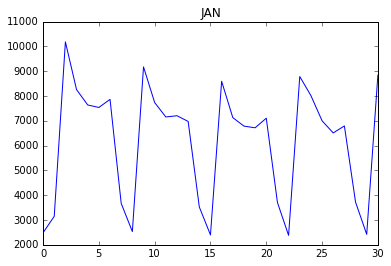

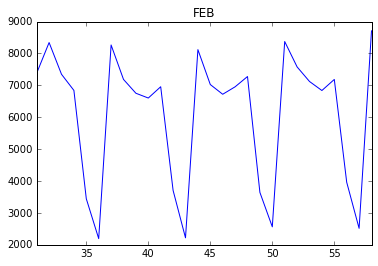

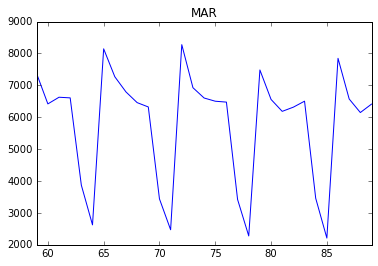

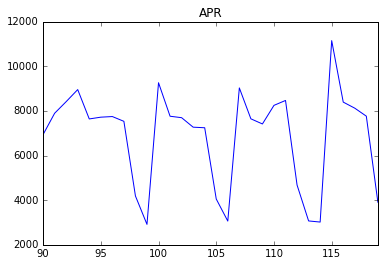

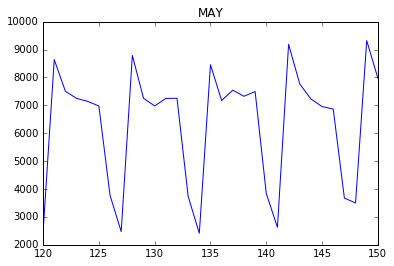

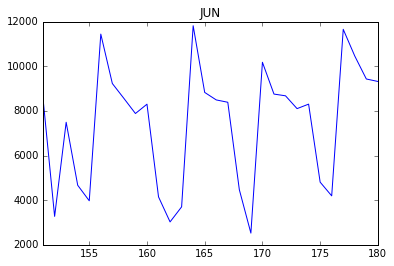

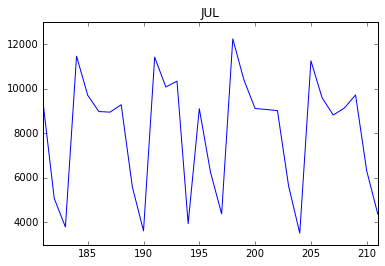

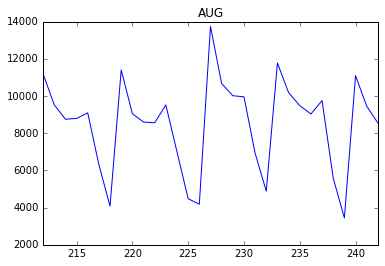

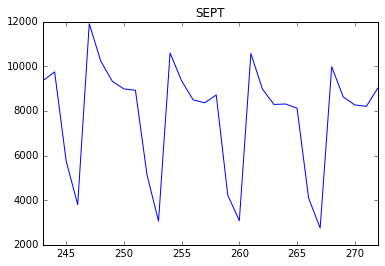

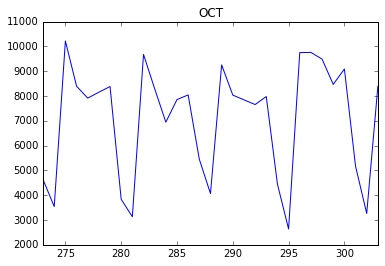

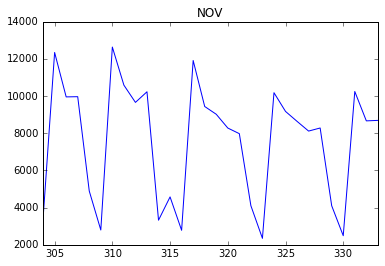

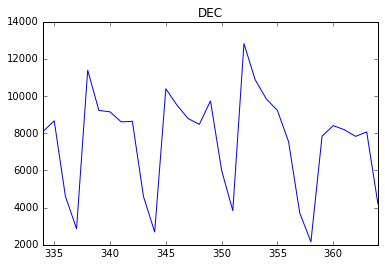

In [11]:
ind = [0,31,59,90,120,151,181,212,243,273,304,334,365]
month =['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEPT',"OCT",'NOV','DEC']
for i in range(1,13):
    sum_per_day_m = sum_per_day[(sum_per_day['month']==i) & (sum_per_day['year']==2011) ]['sum']
    plt.figure()
    sum_per_day_m.plot('line')
    plt.title(month[i-1])
    

In [12]:
sum_per_day_per_ass = pd.DataFrame({'sum':df.groupby(['day','month','year','ASS_ASSIGNMENT'])['CSPL_RECEIVED_CALLS'].sum()}).reset_index()

In [13]:
list_of_ass = pd.Series.unique(df['ASS_ASSIGNMENT'])

In [14]:
print (list_of_ass)

['Téléphonie' 'RTC' 'Gestion Renault' 'Nuit'
 'Gestion - Accueil Telephonique' 'Regulation Medicale' 'Services'
 'Tech. Total' 'Gestion Relation Clienteles' 'Crises' 'Japon' 'Médical'
 'Gestion Assurances' 'Domicile' 'Gestion' 'SAP' 'RENAULT' 'Gestion Amex'
 'Tech. Inter' 'Gestion Clients' 'Manager' 'Tech. Axa' 'CAT' 'Gestion DZ'
 'Mécanicien' 'CMS' 'Prestataires' 'Evenements']


Téléphonie
RTC


/Applications/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Gestion Renault
Nuit
Gestion - Accueil Telephonique
Regulation Medicale
Services
Tech. Total
Gestion Relation Clienteles
Crises
Japon
Médical
Gestion Assurances
Domicile
Gestion
SAP
RENAULT
Gestion Amex


TypeError: Empty 'DataFrame': no numeric data to plot

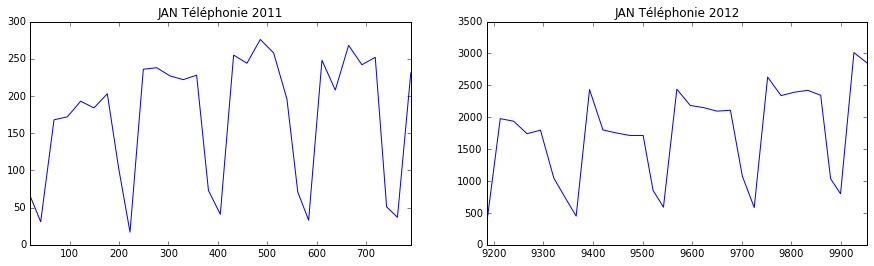

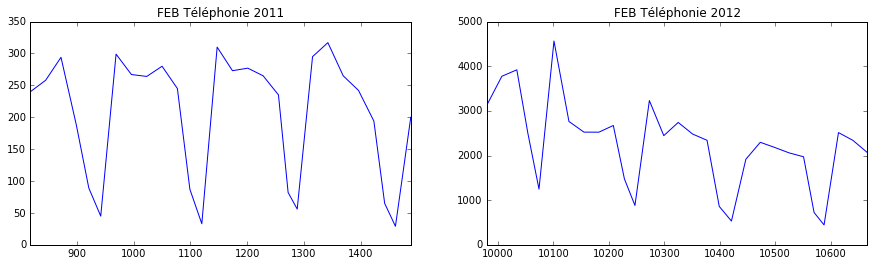

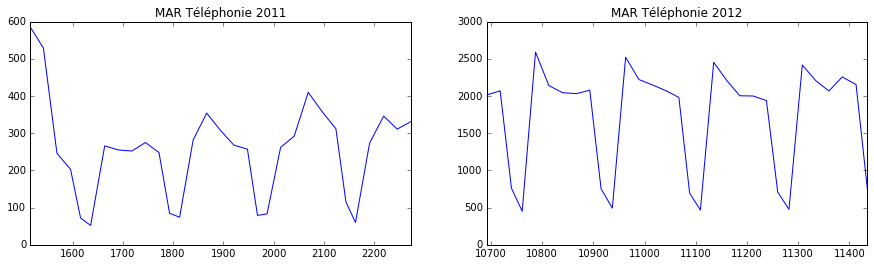

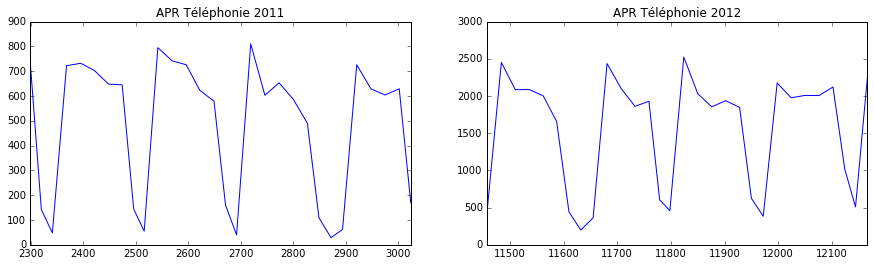

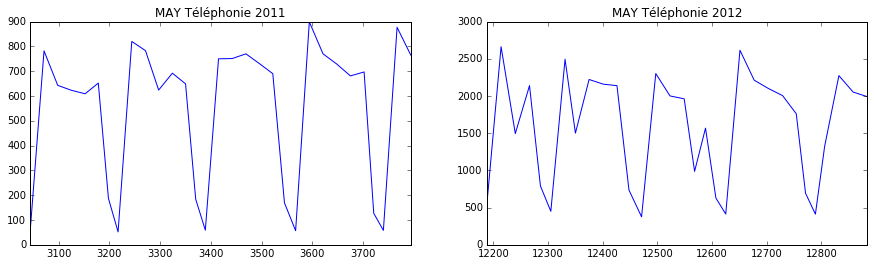

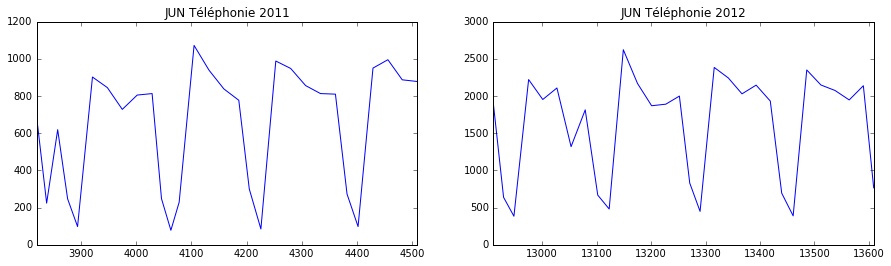

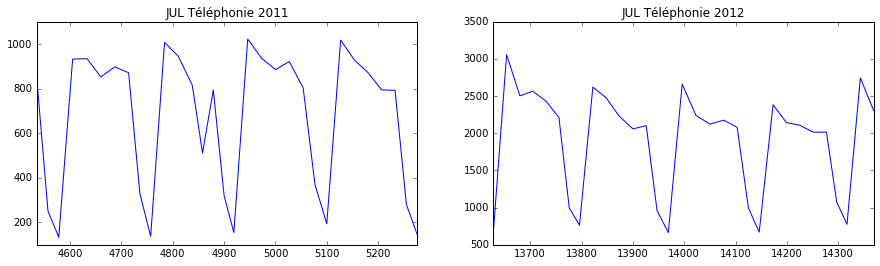

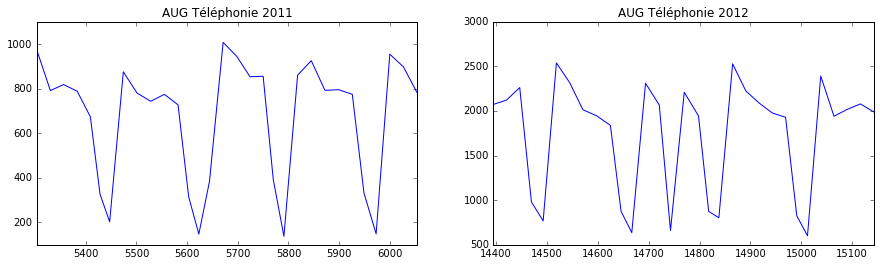

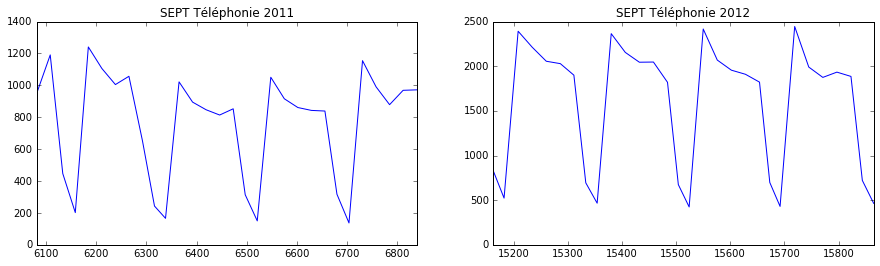

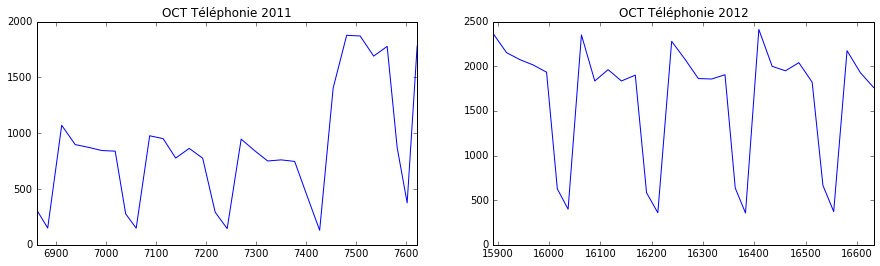

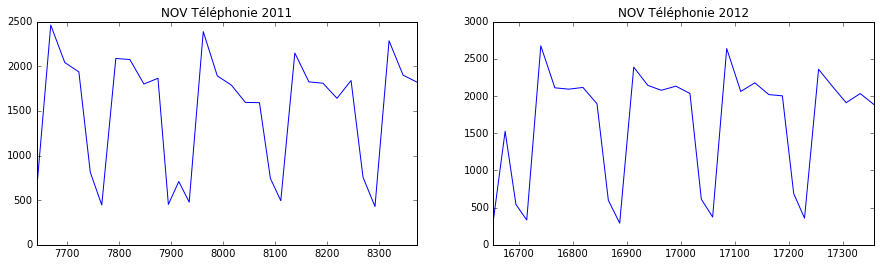

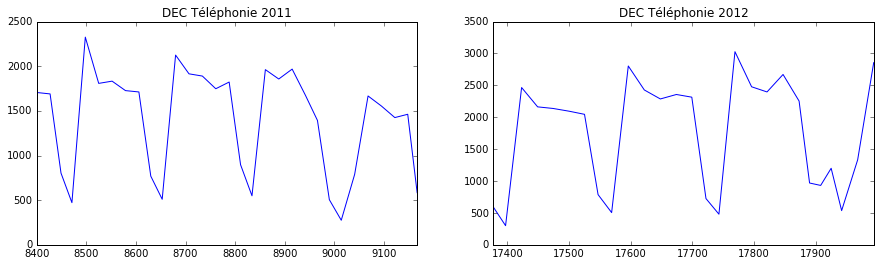

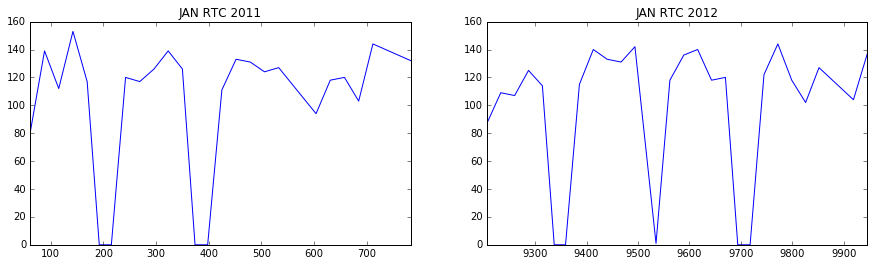

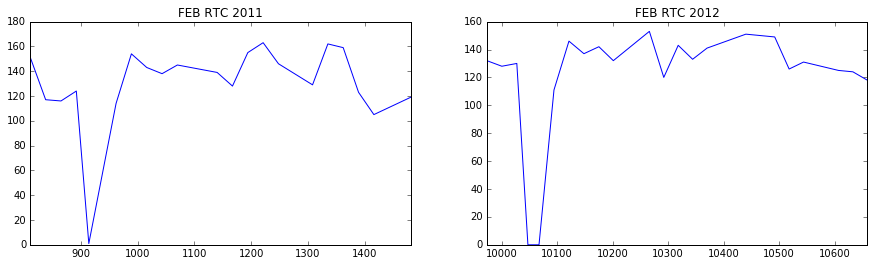

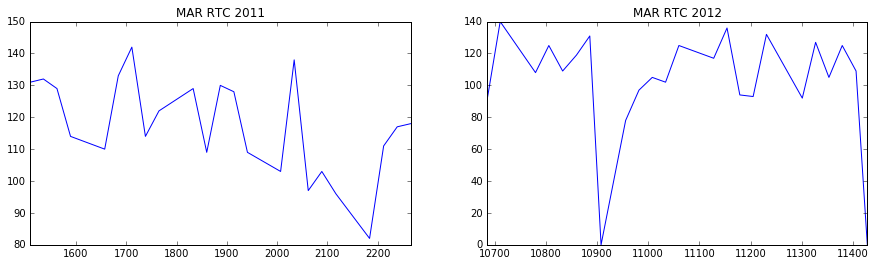

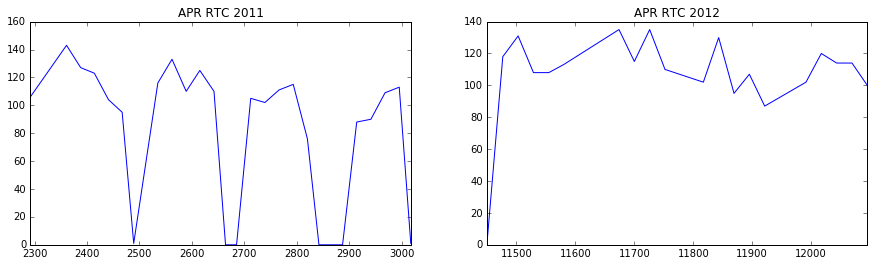

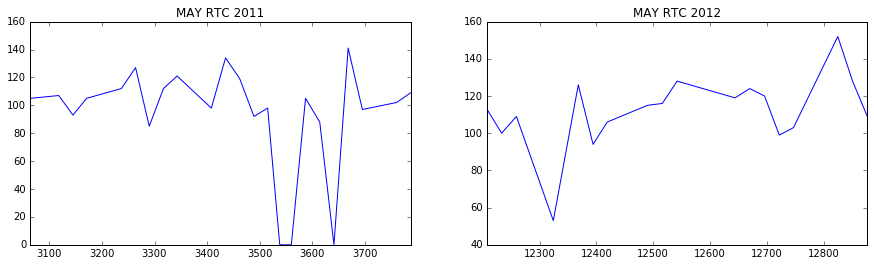

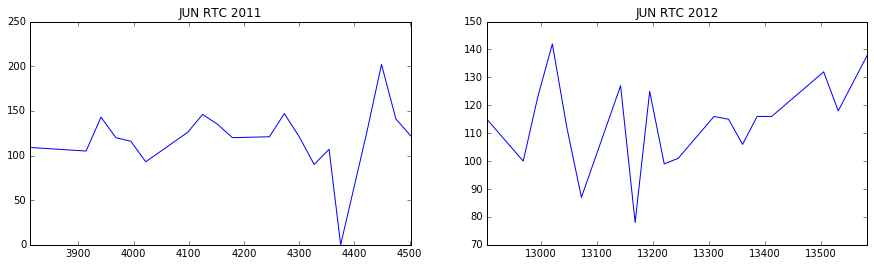

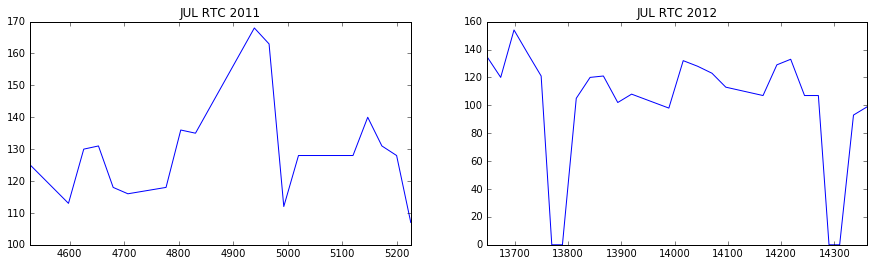

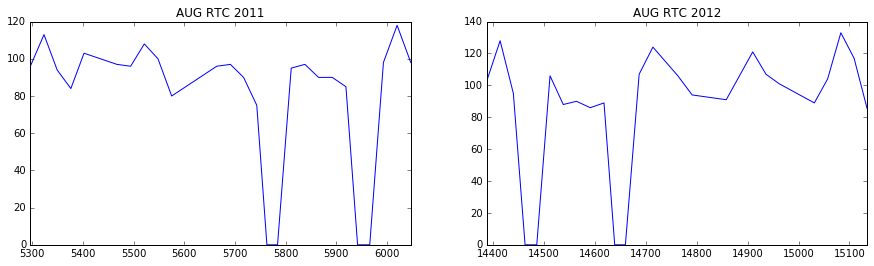

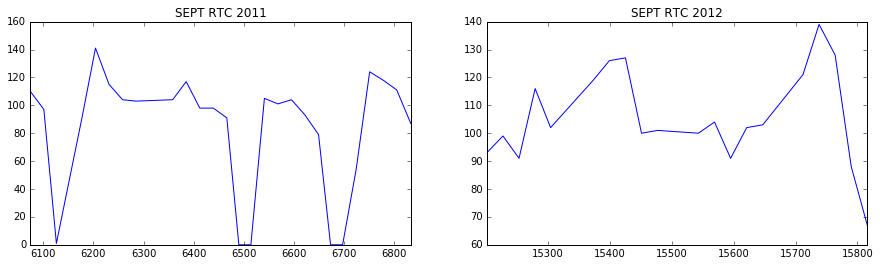

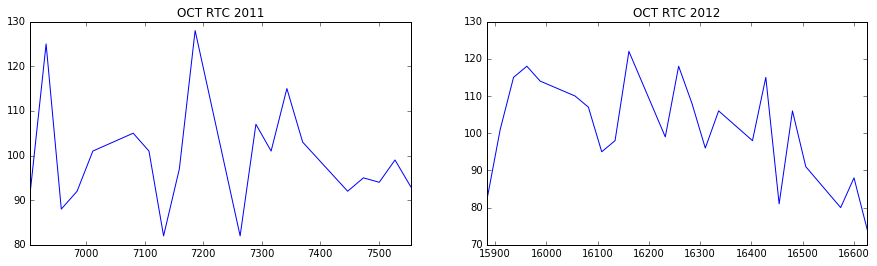

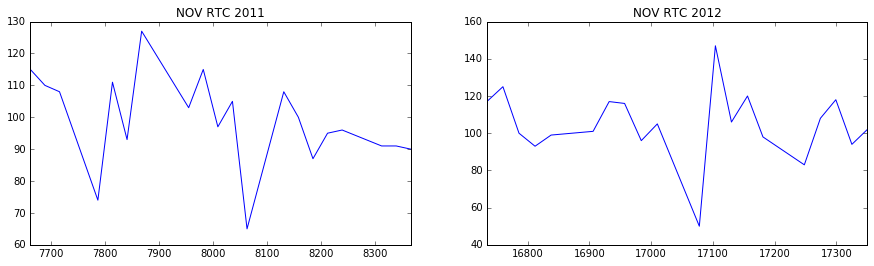

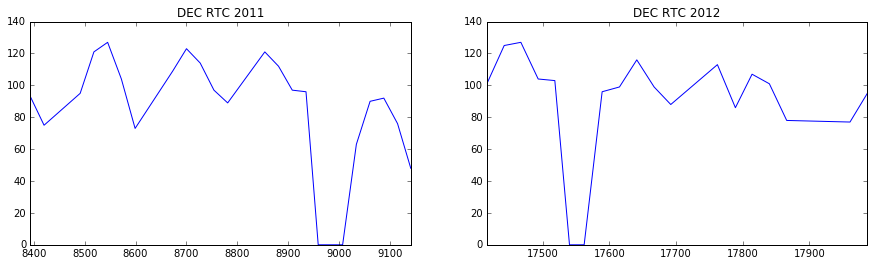

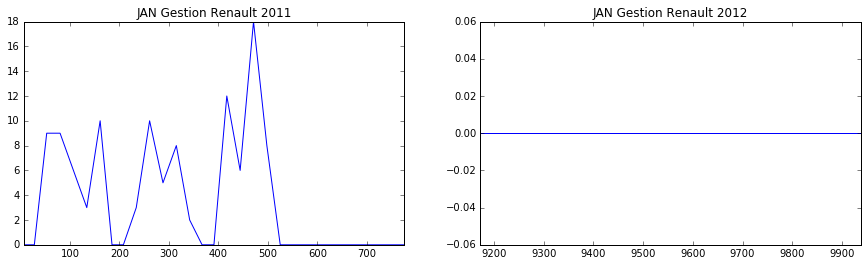

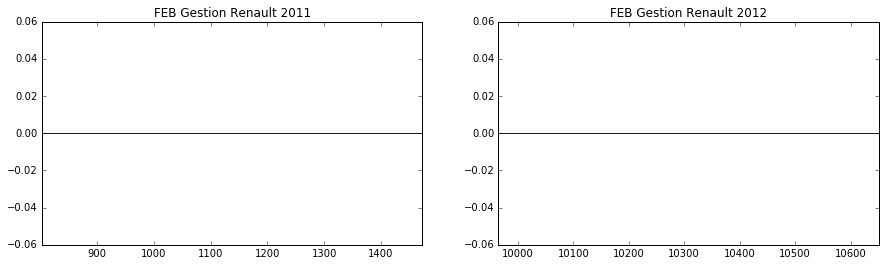

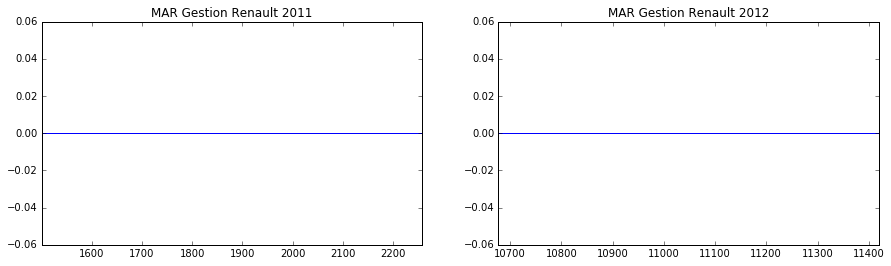

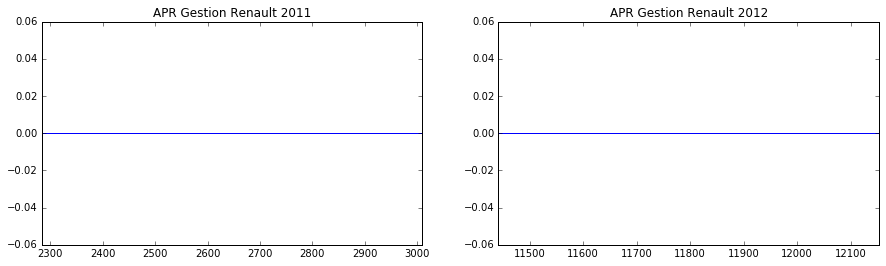

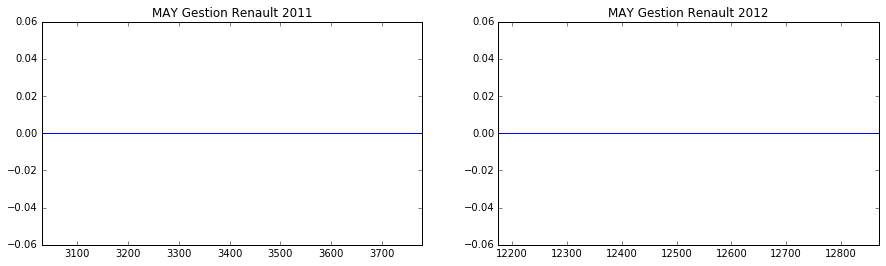

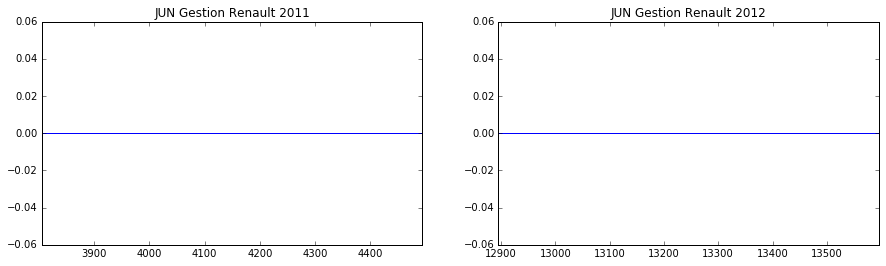

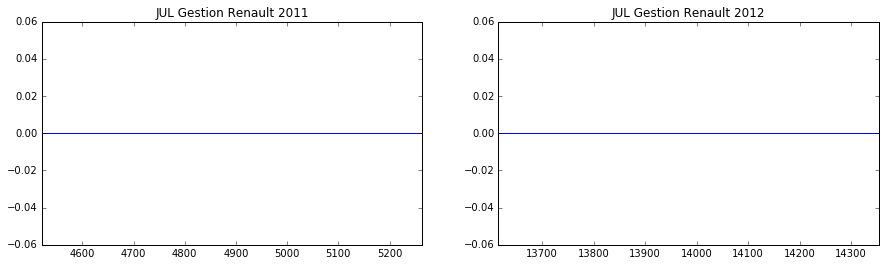

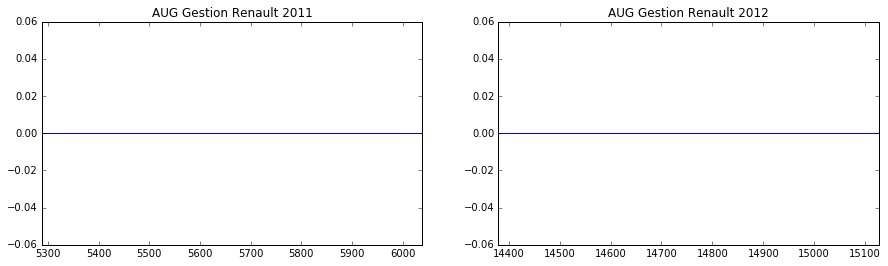

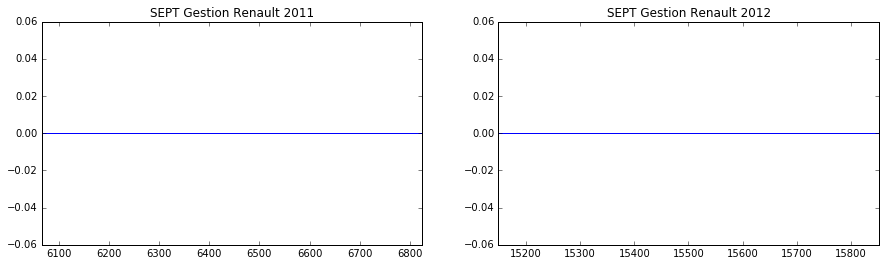

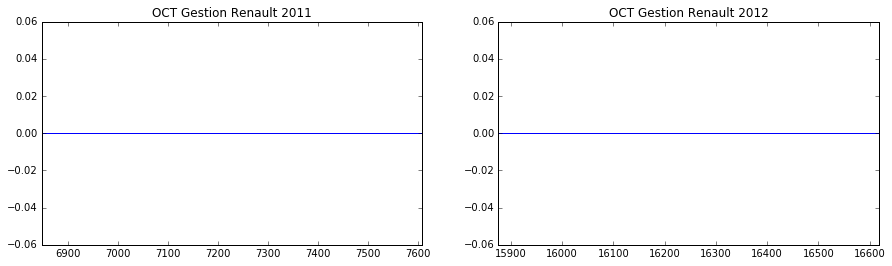

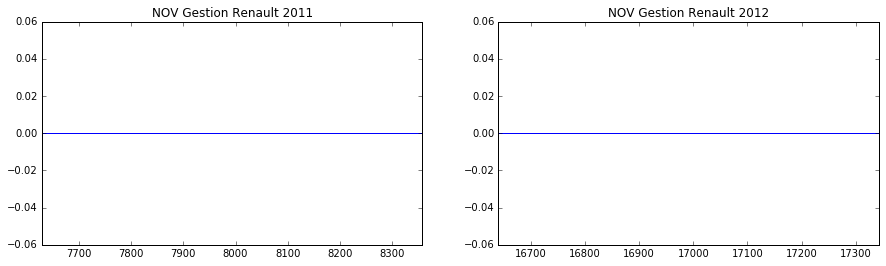

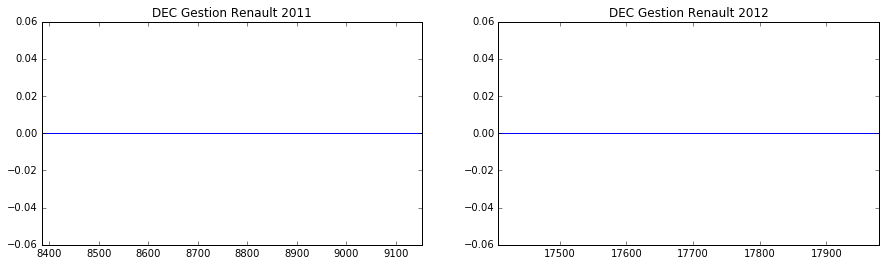

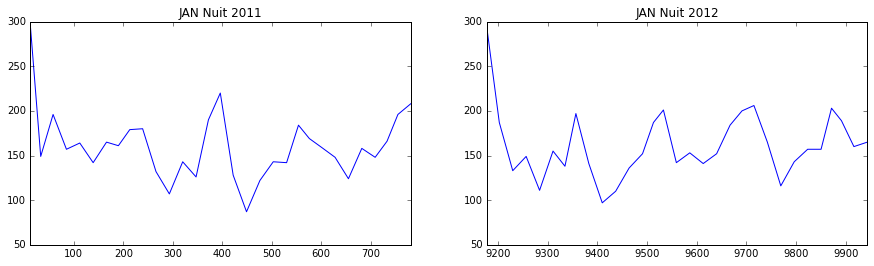

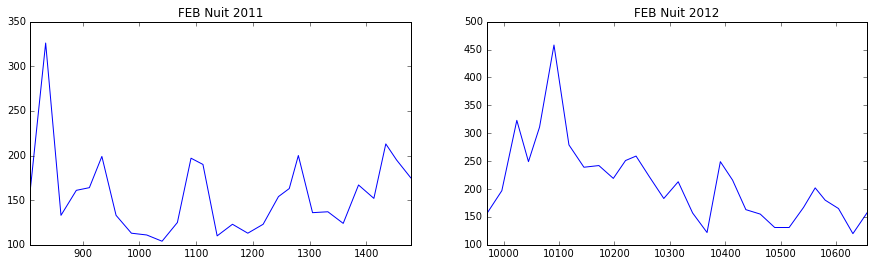

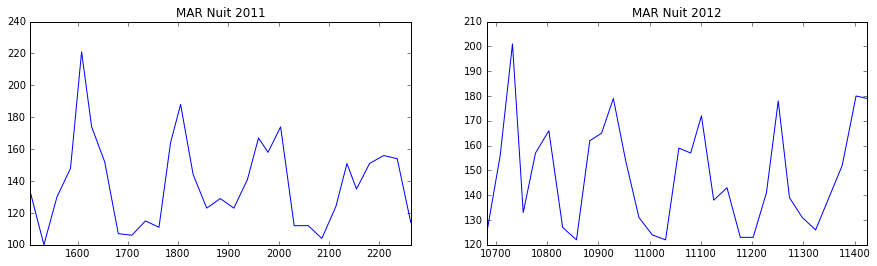

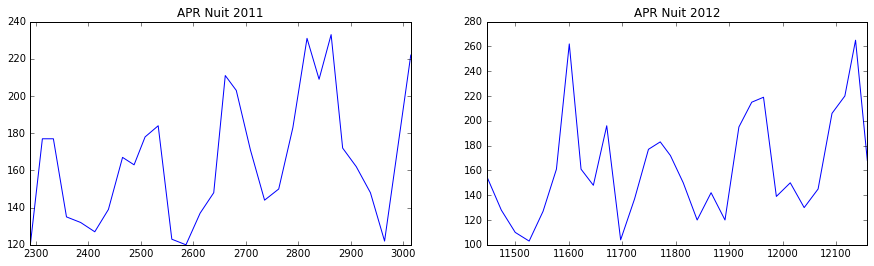

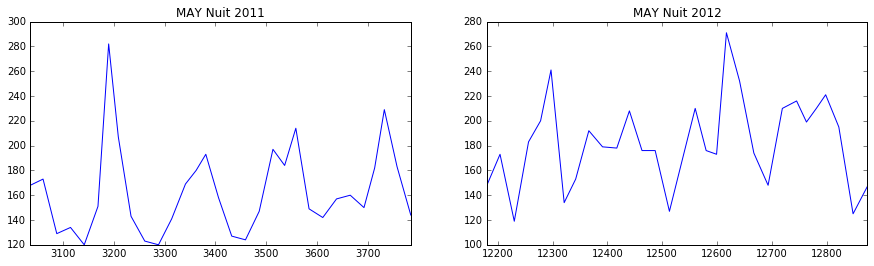

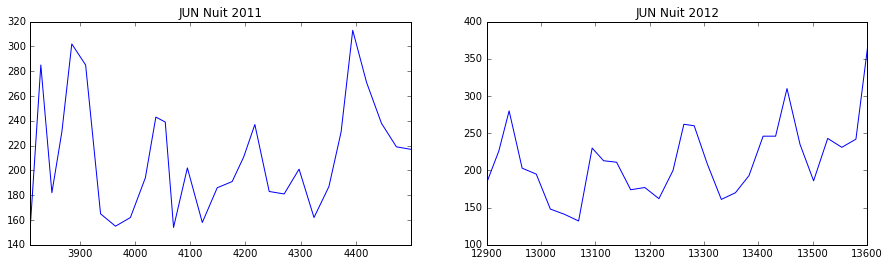

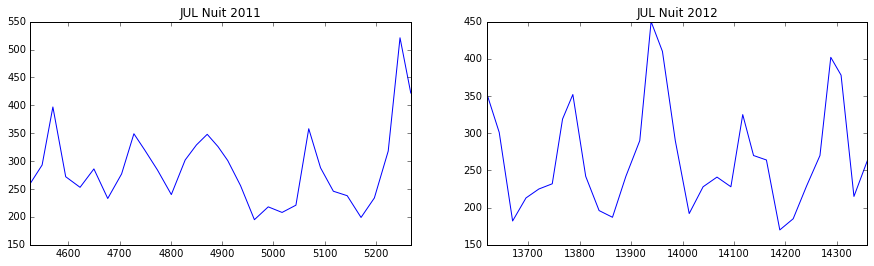

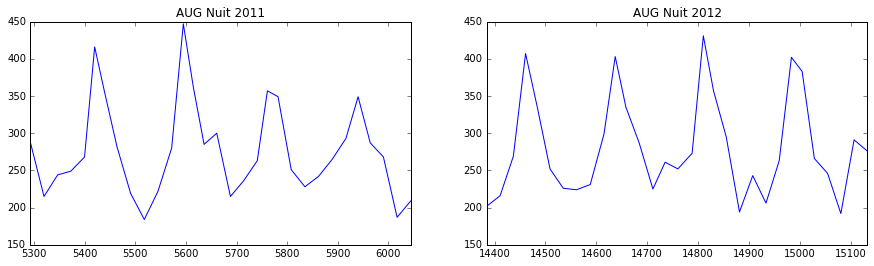

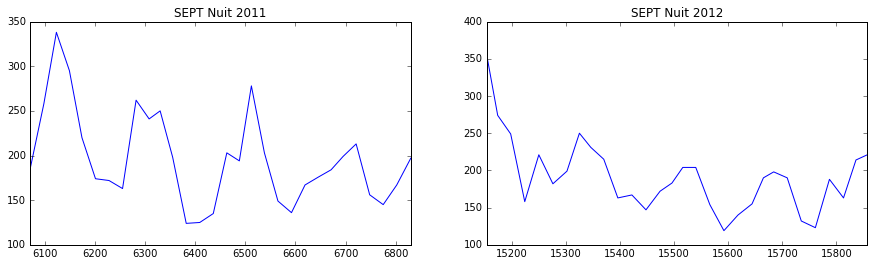

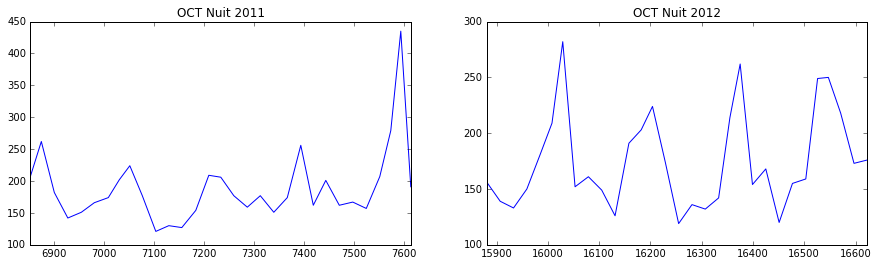

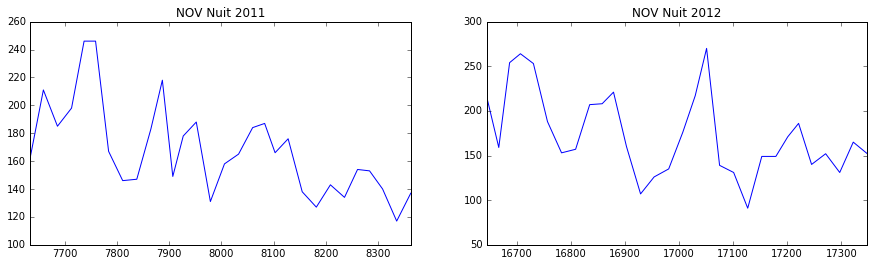

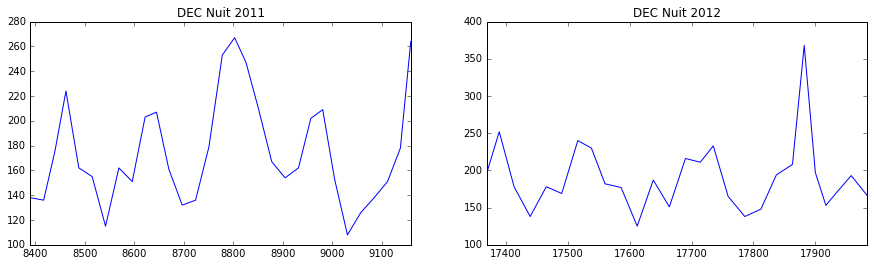

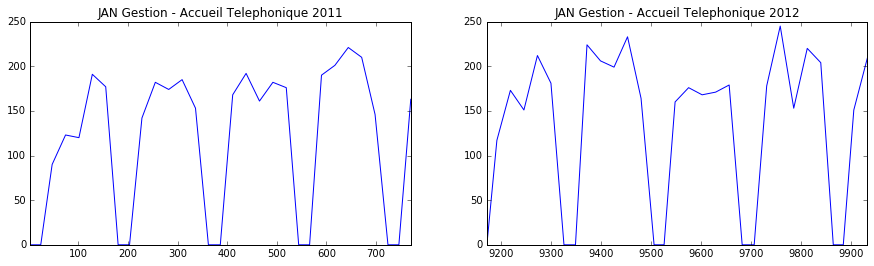

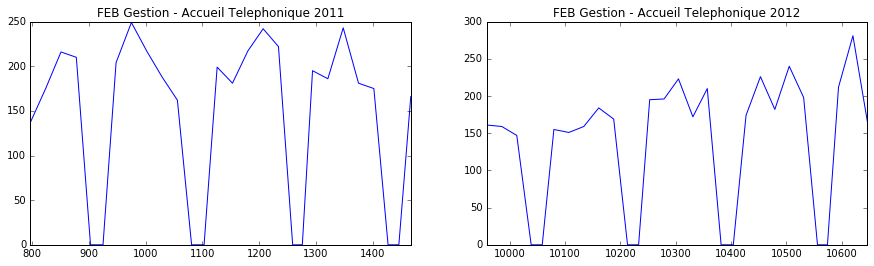

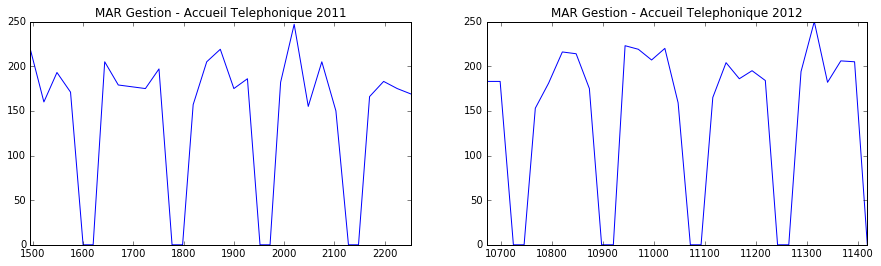

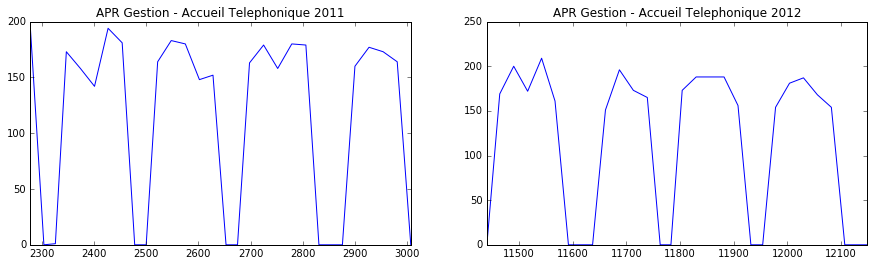

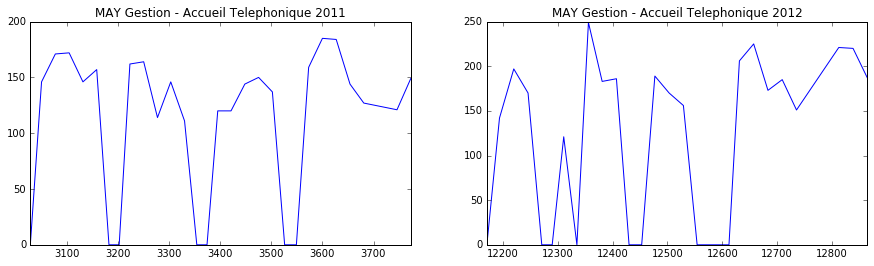

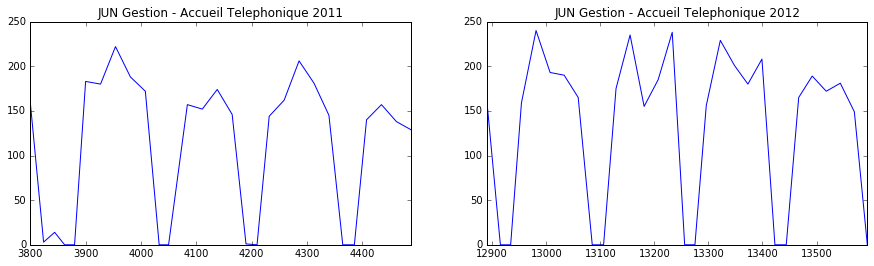

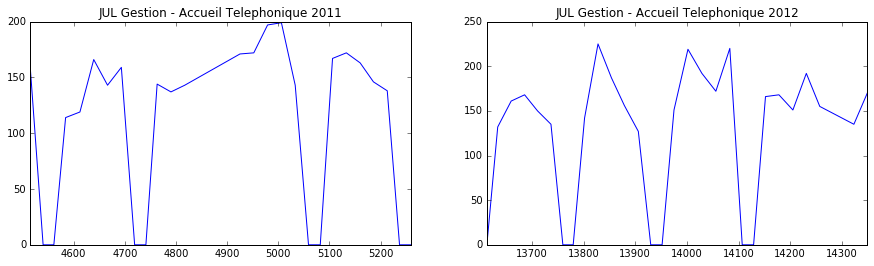

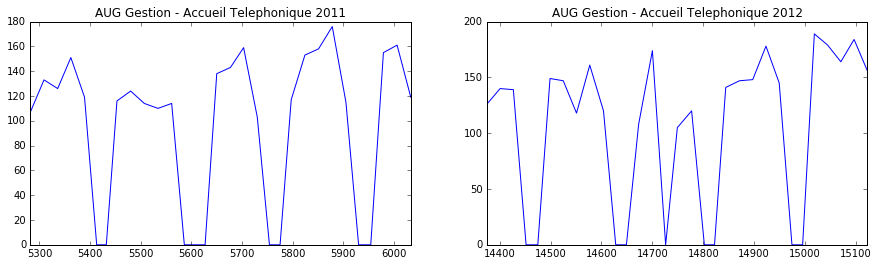

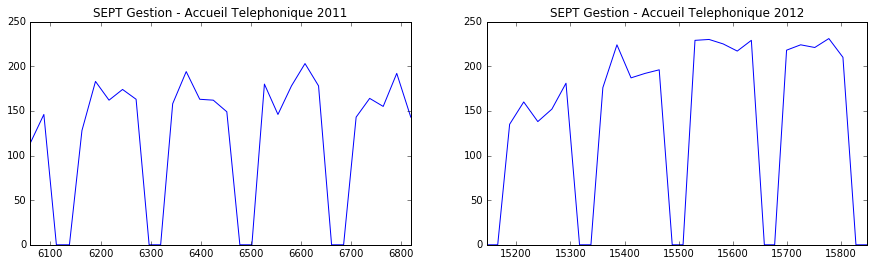

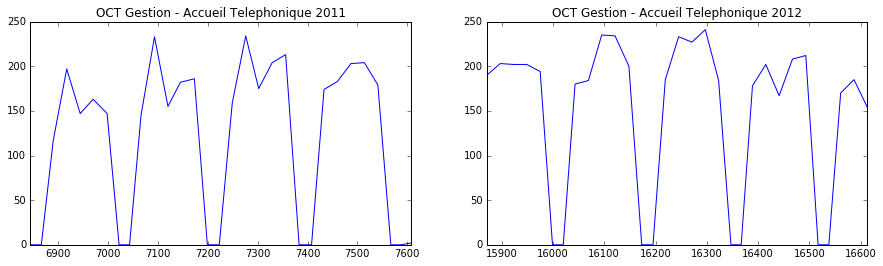

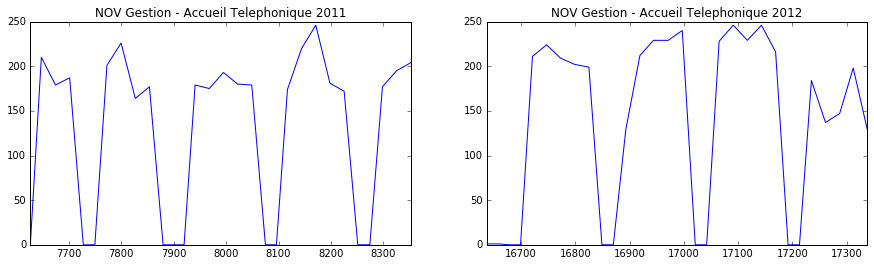

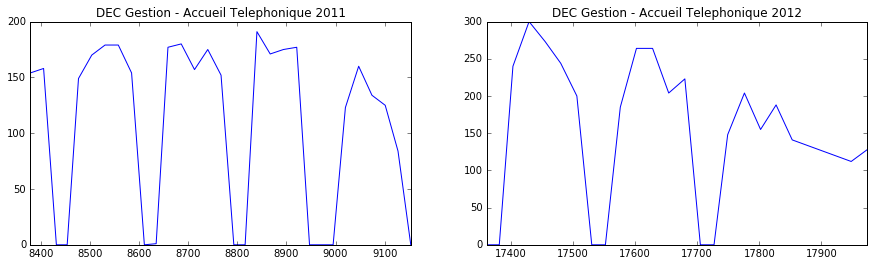

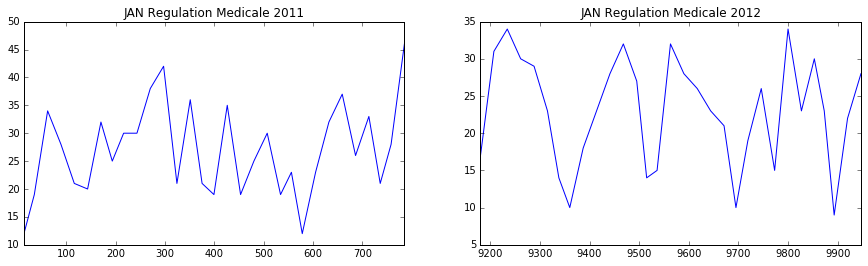

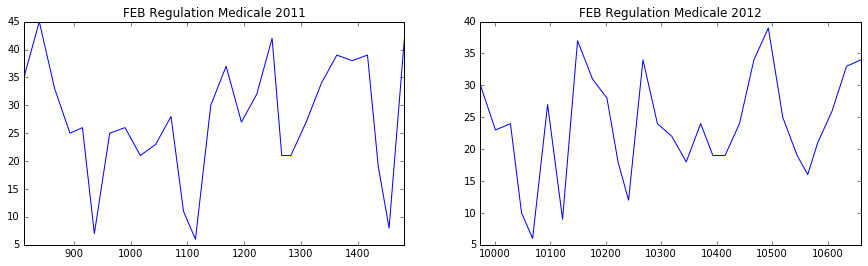

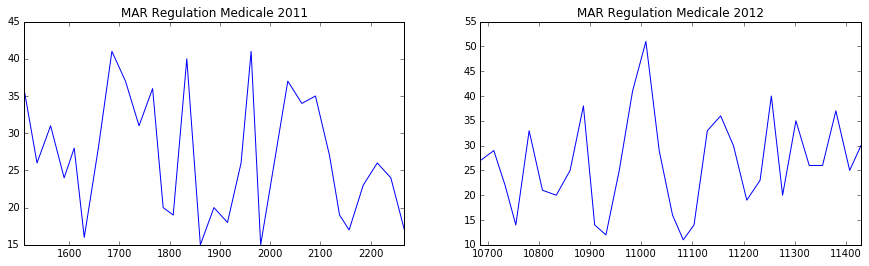

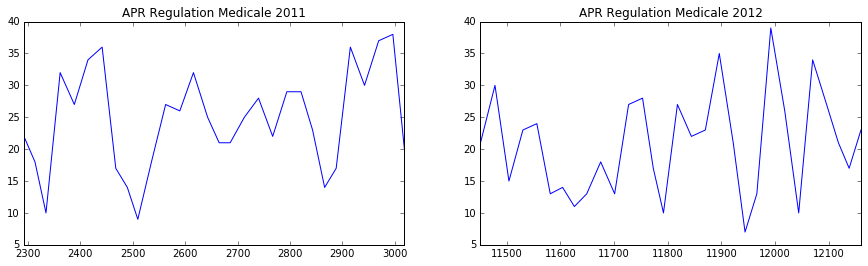

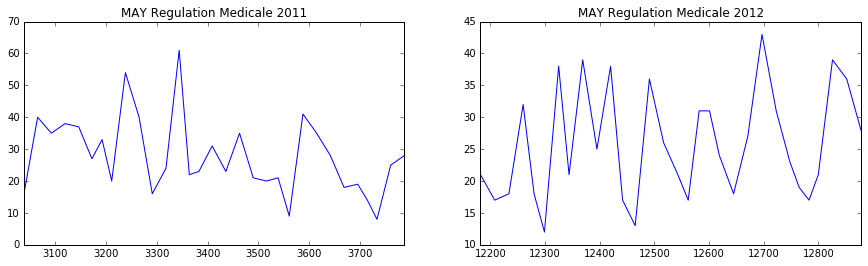

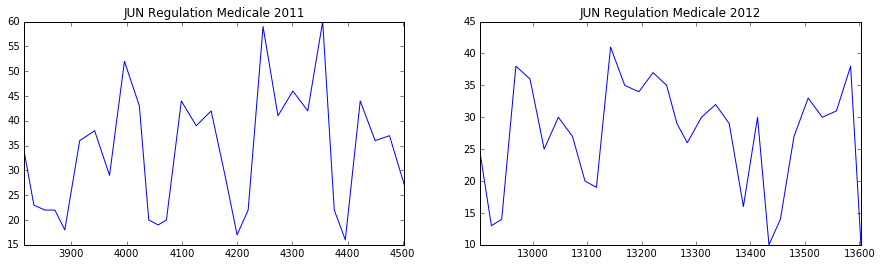

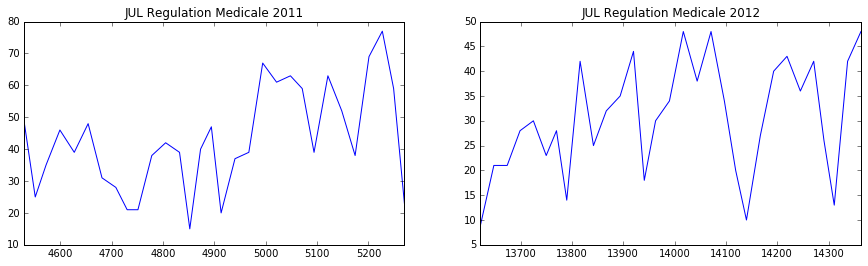

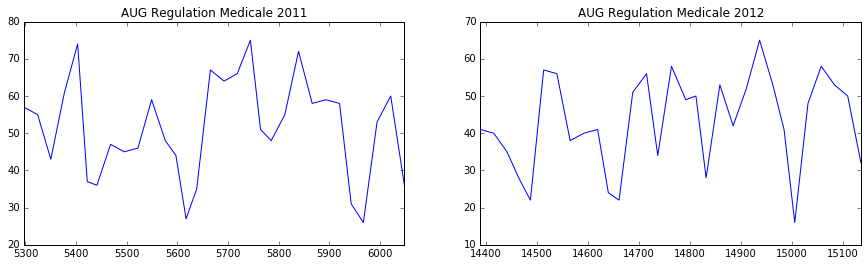

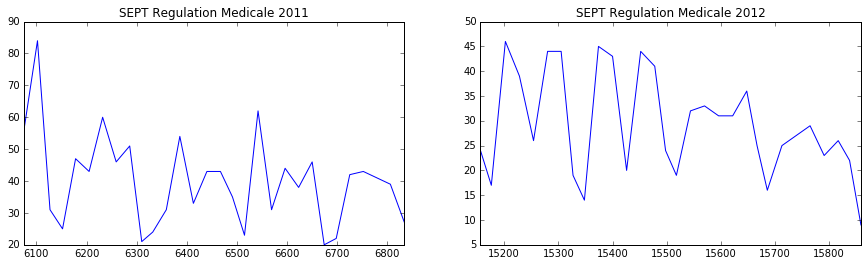

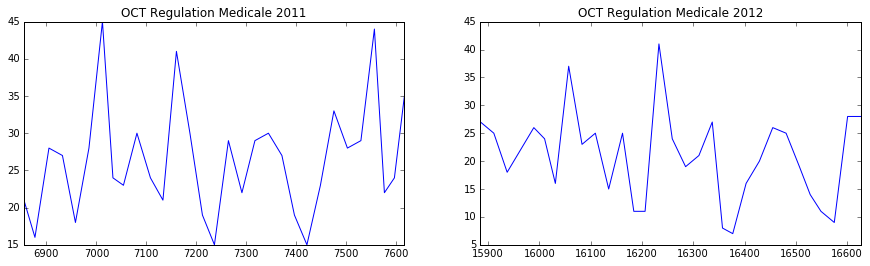

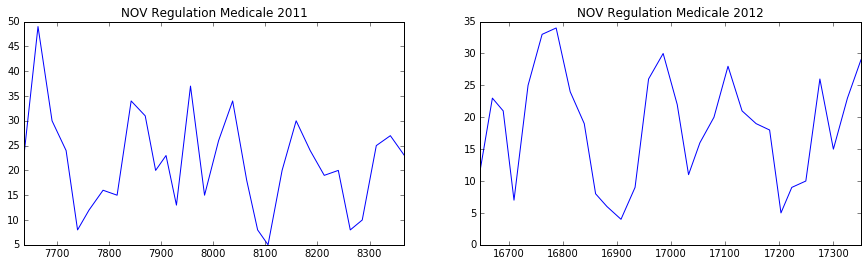

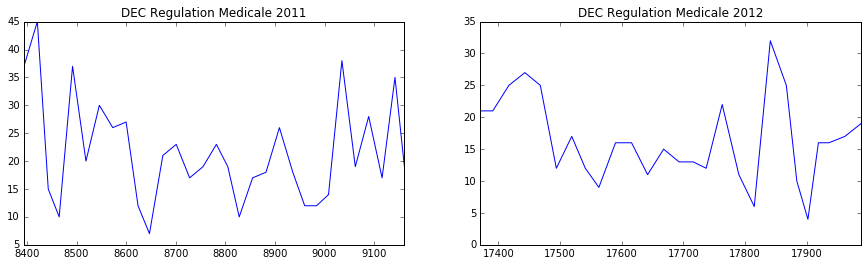

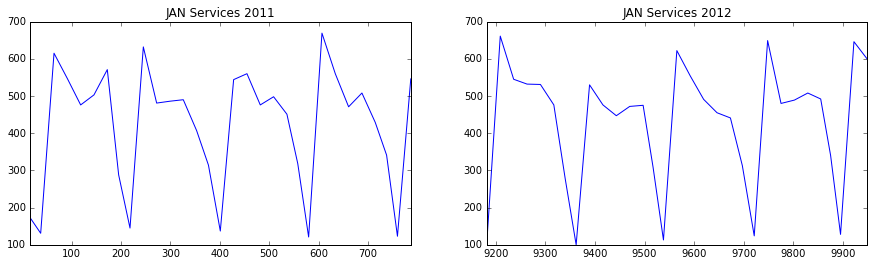

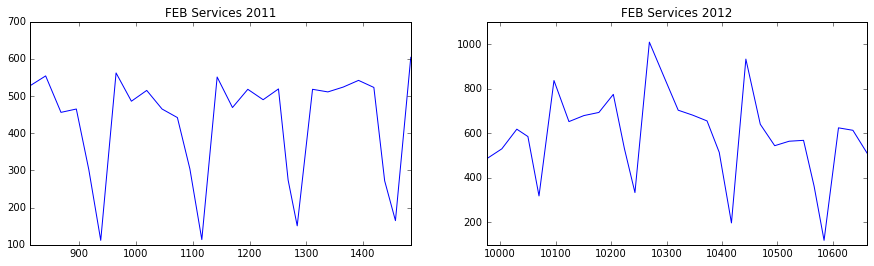

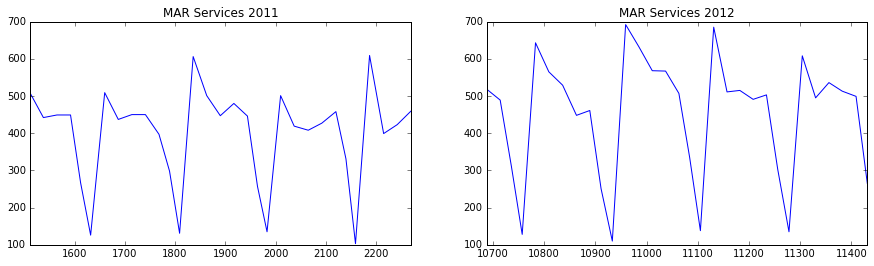

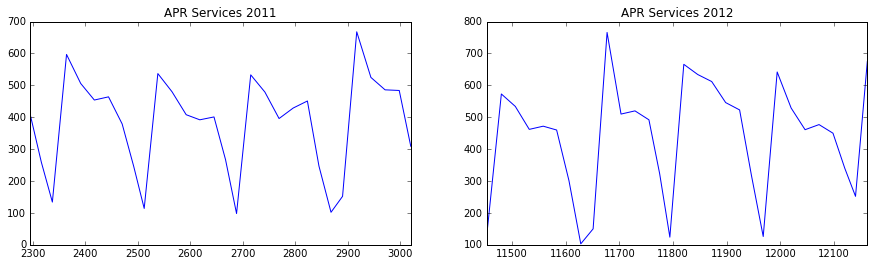

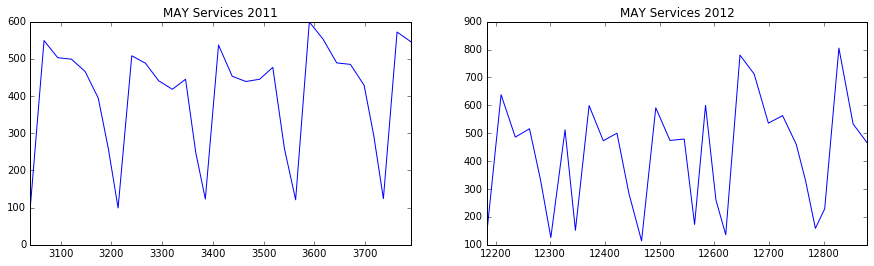

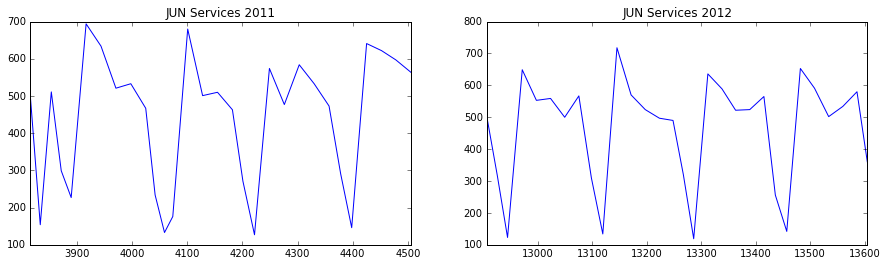

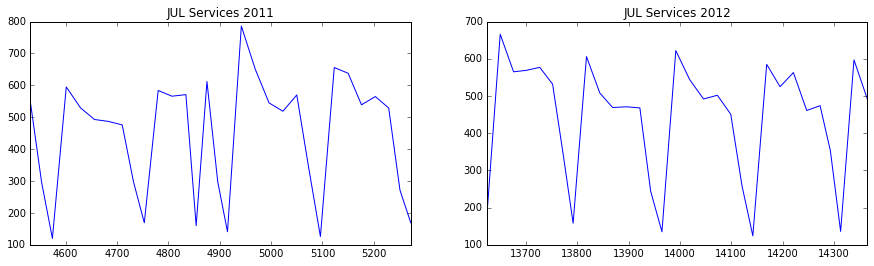

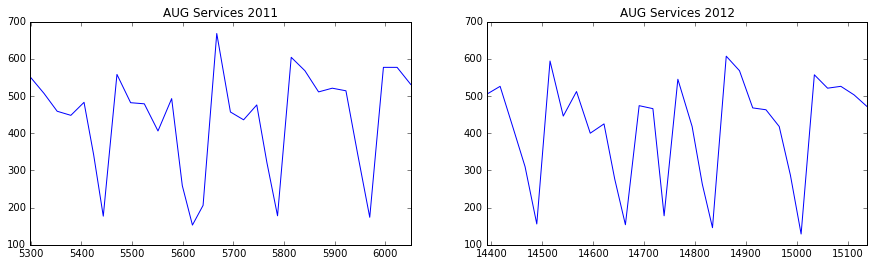

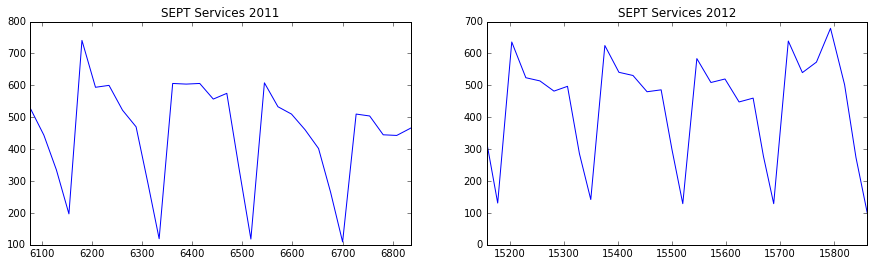

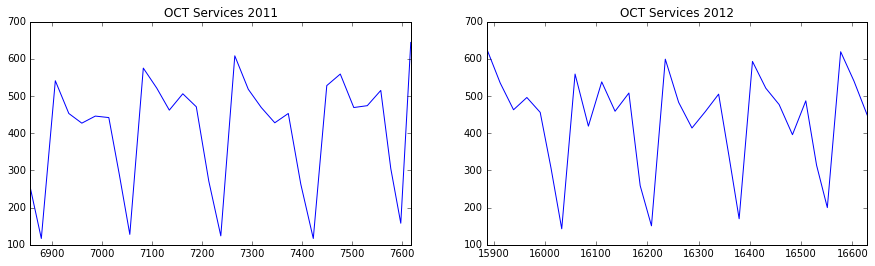

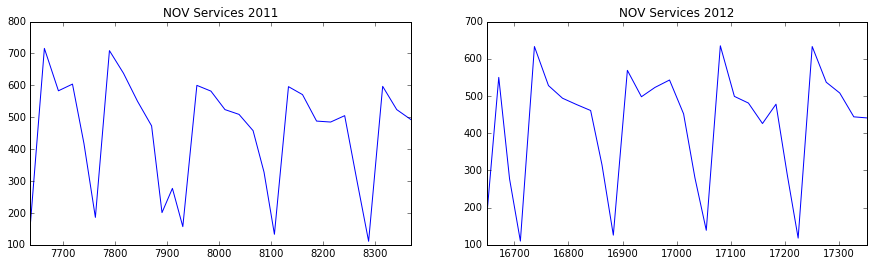

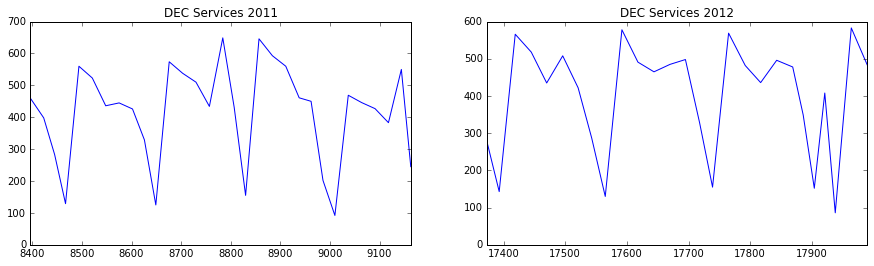

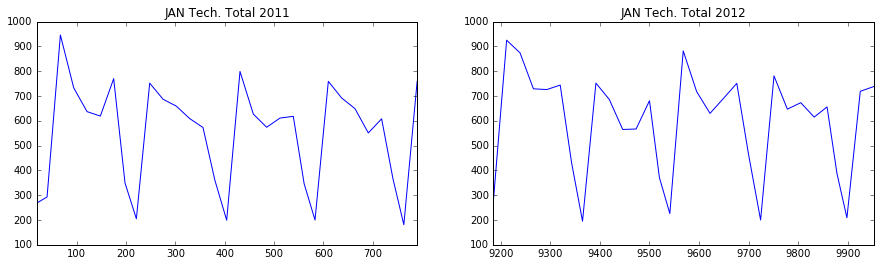

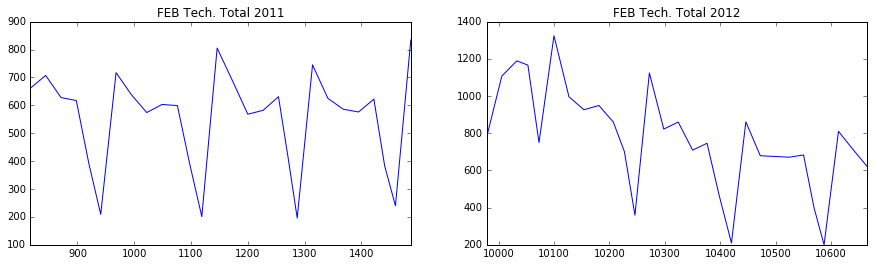

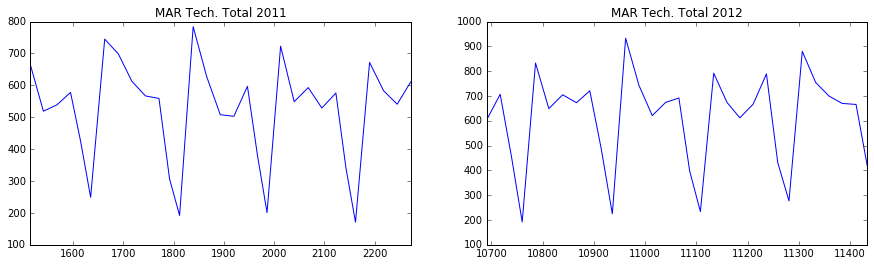

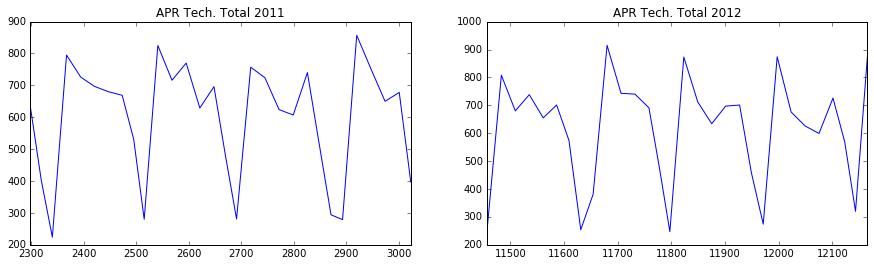

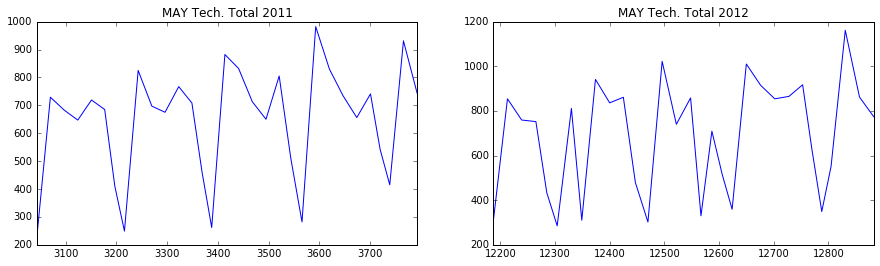

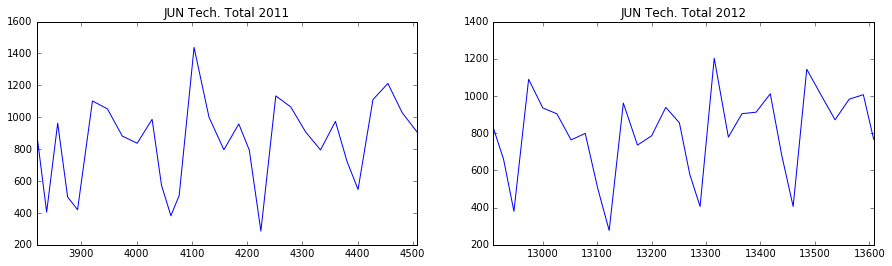

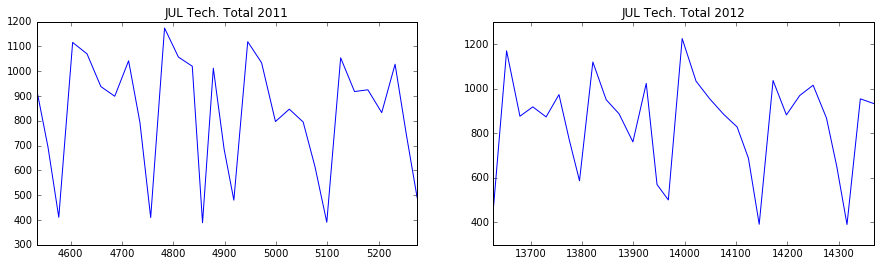

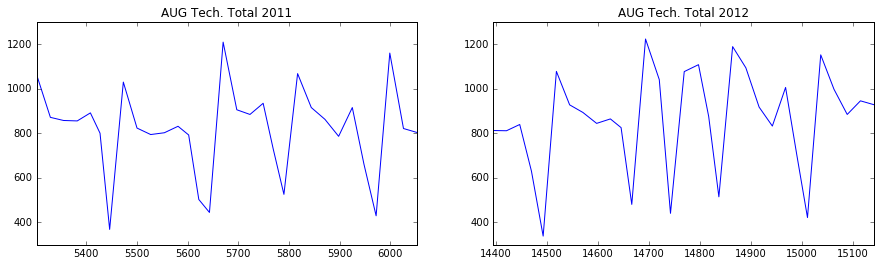

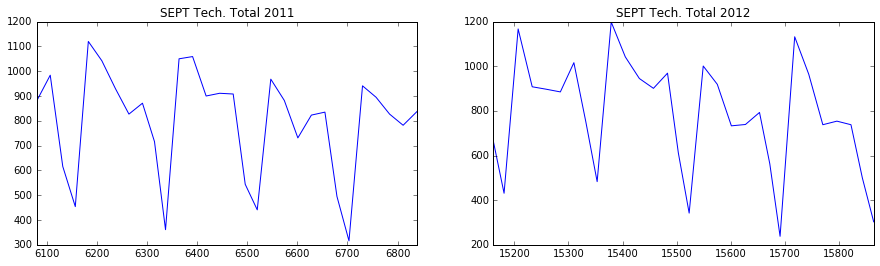

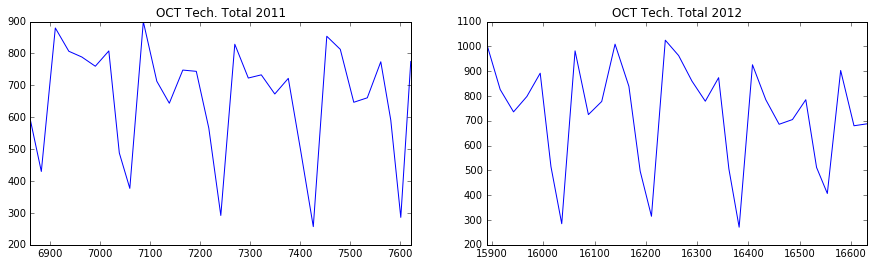

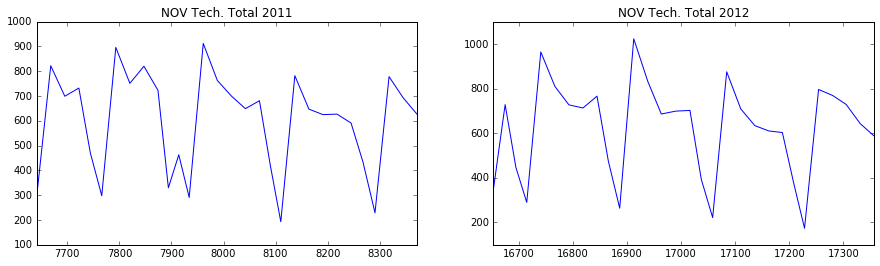

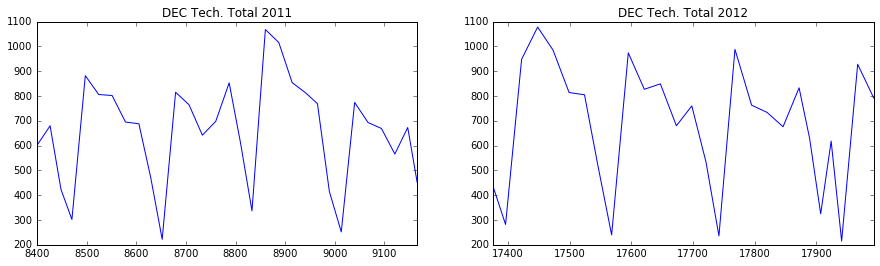

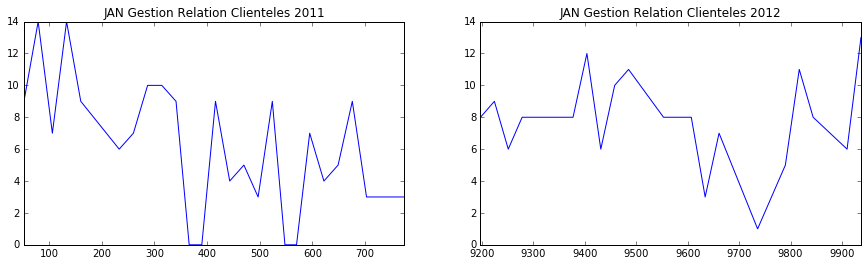

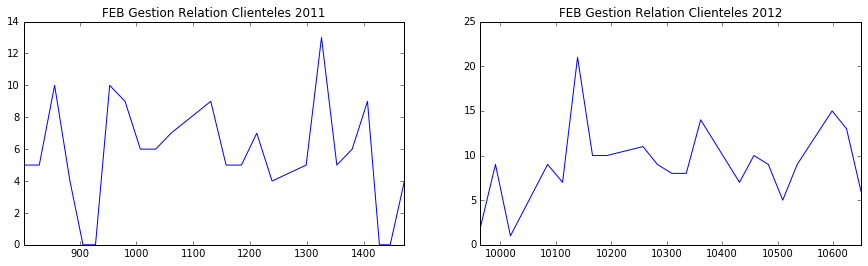

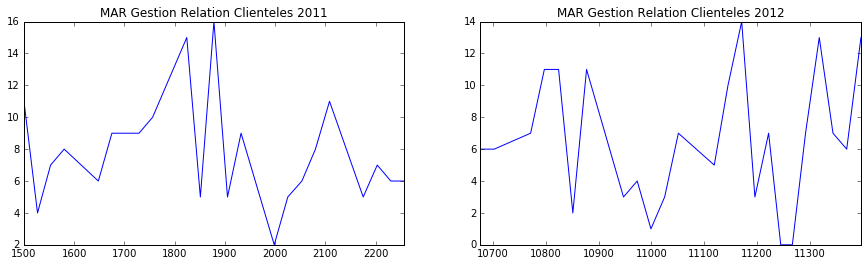

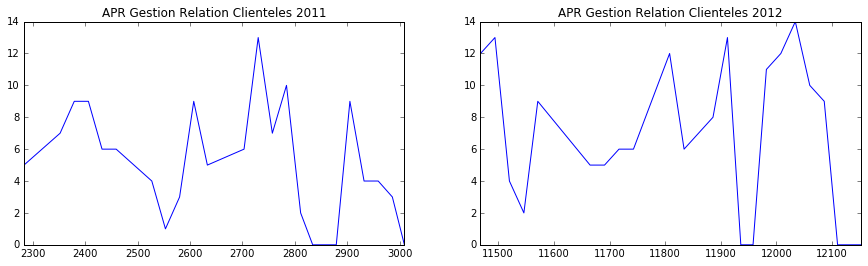

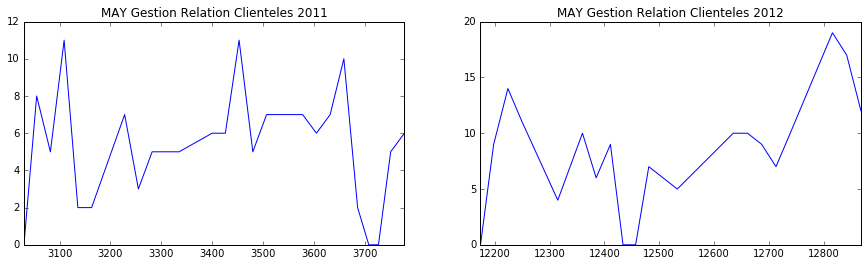

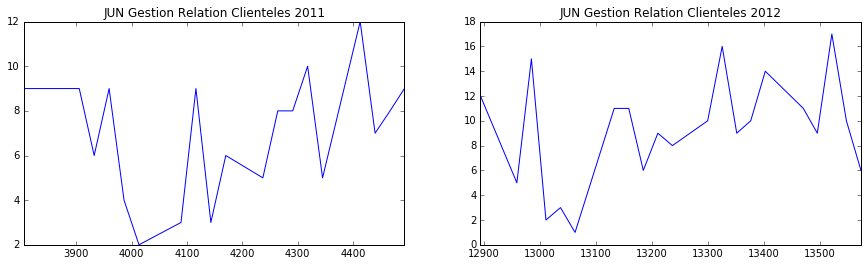

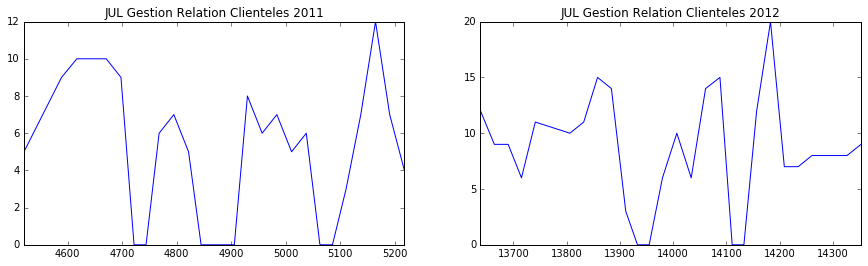

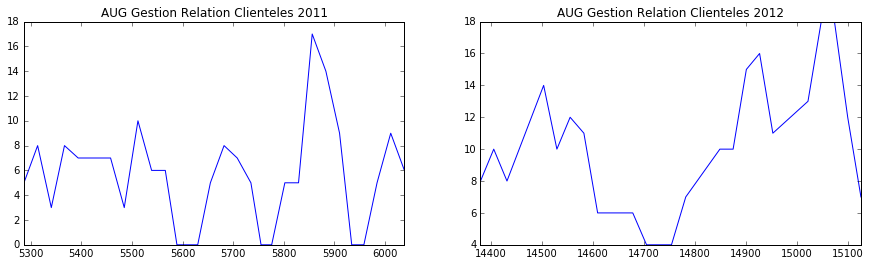

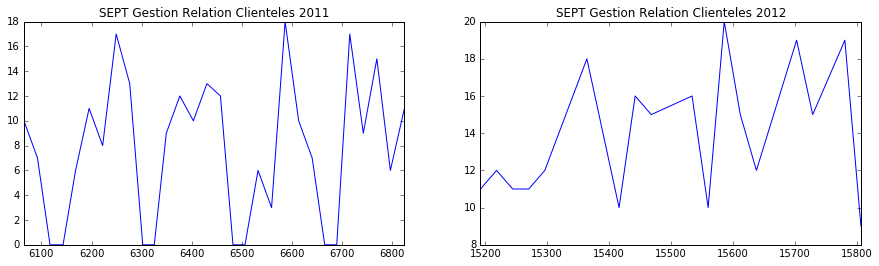

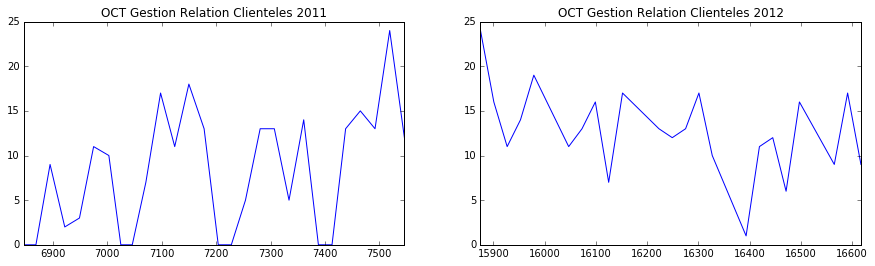

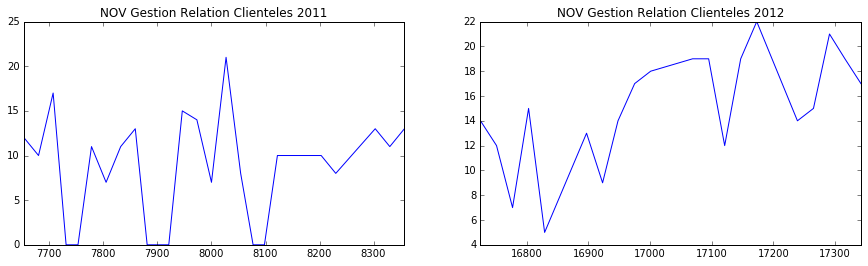

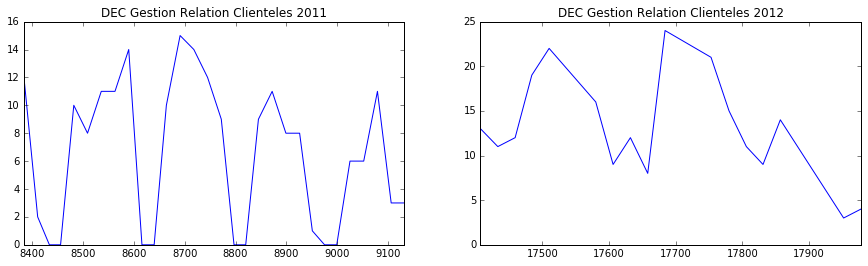

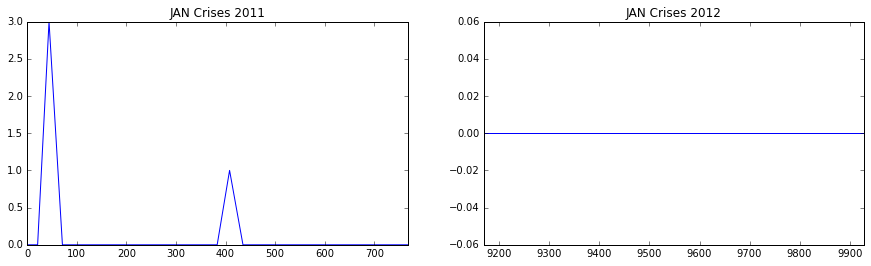

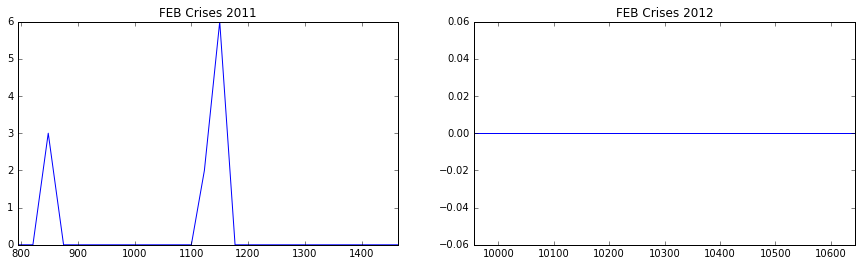

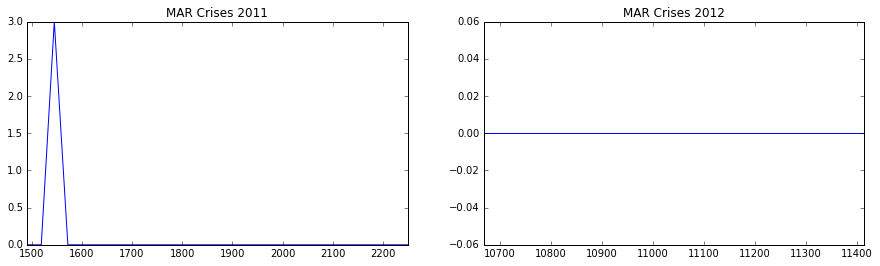

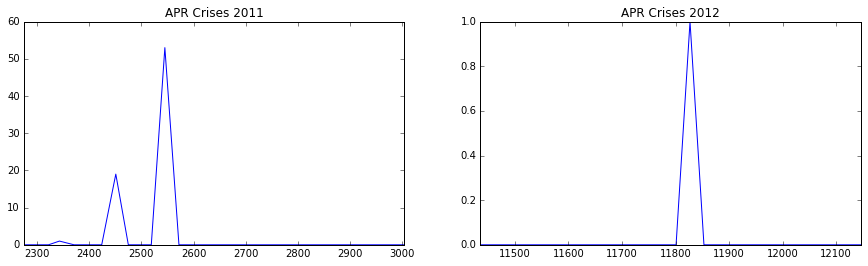

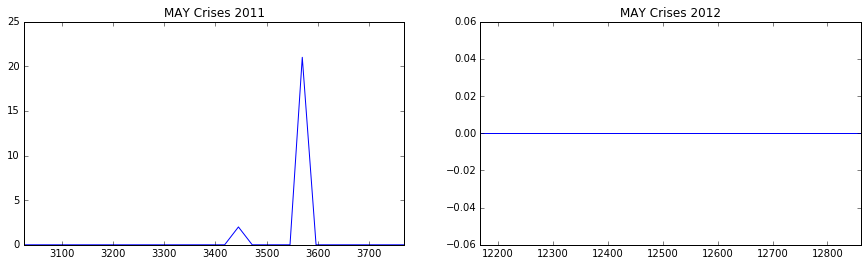

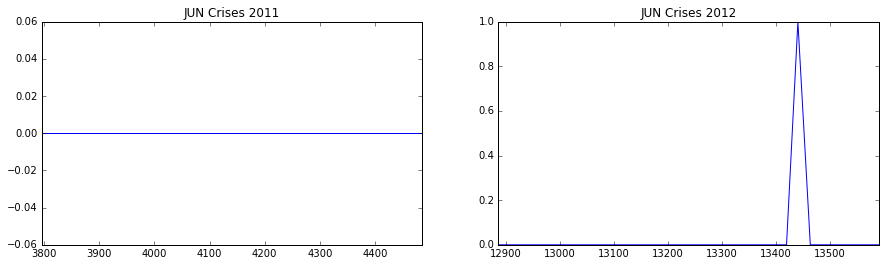

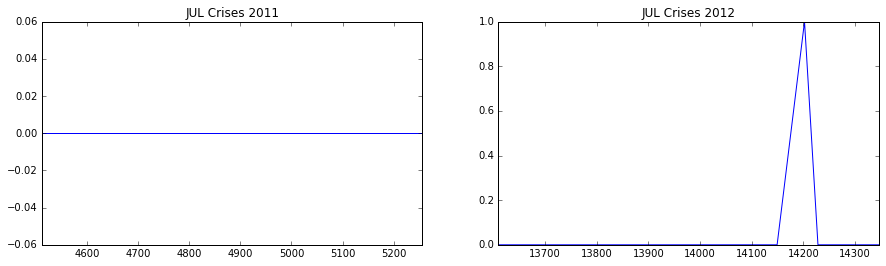

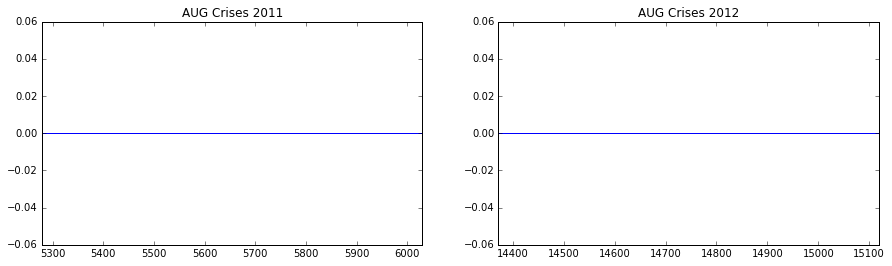

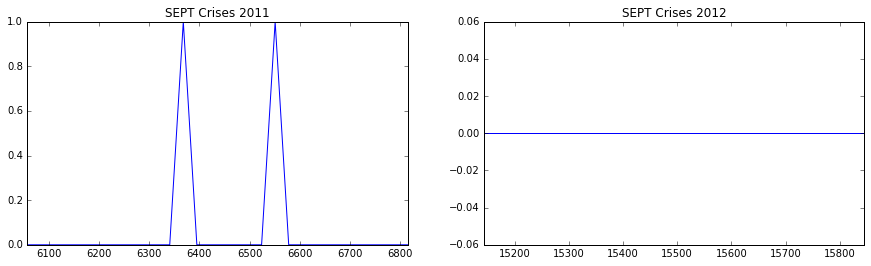

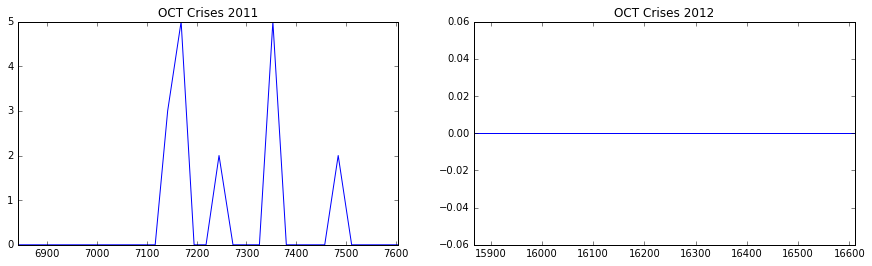

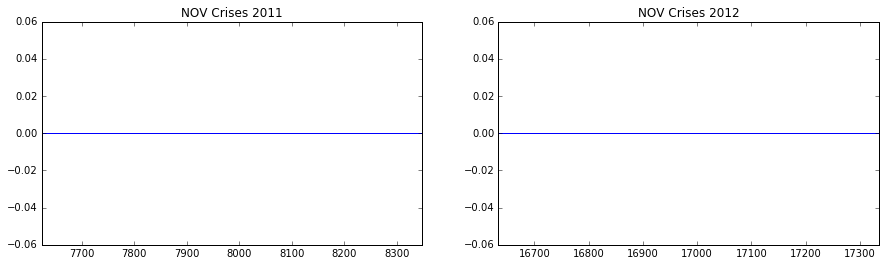

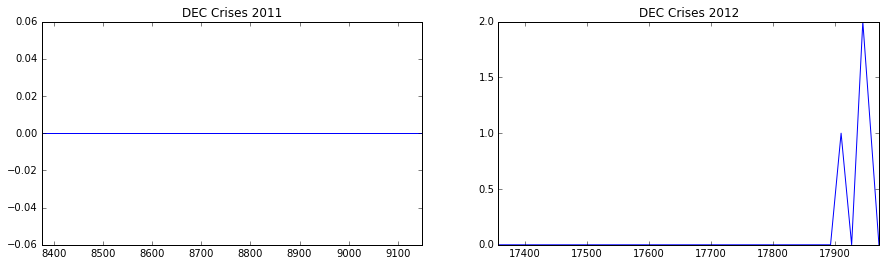

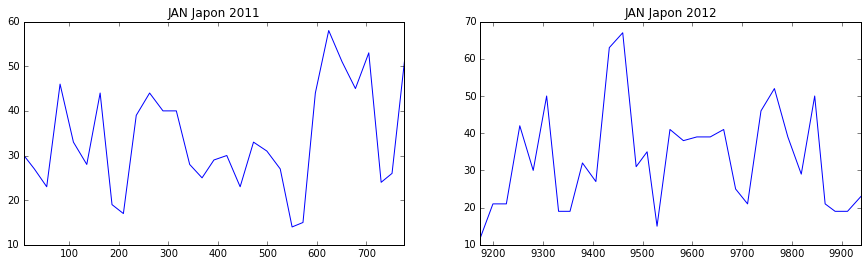

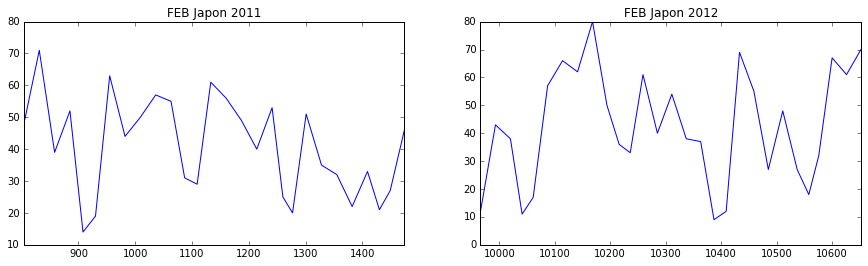

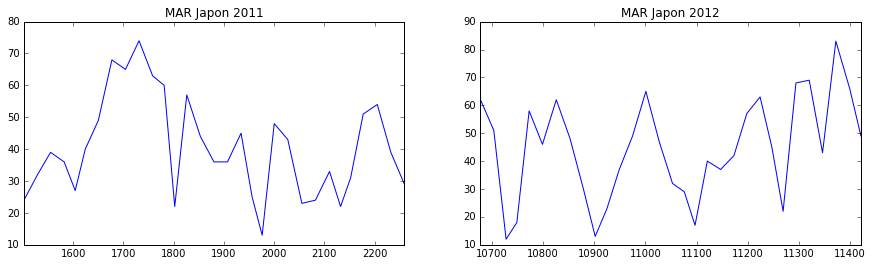

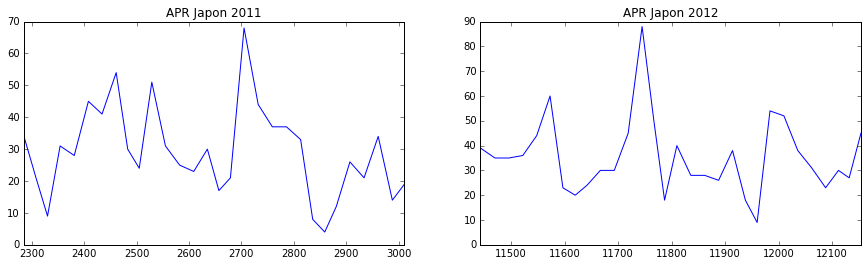

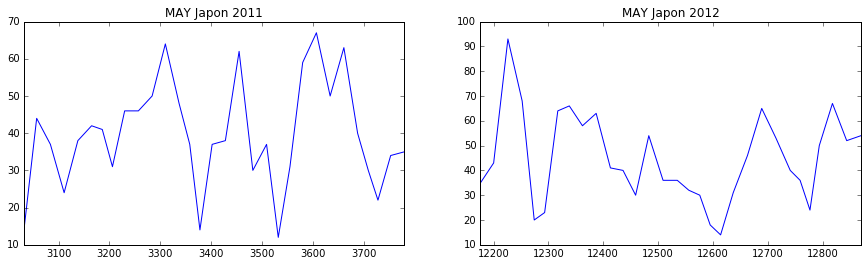

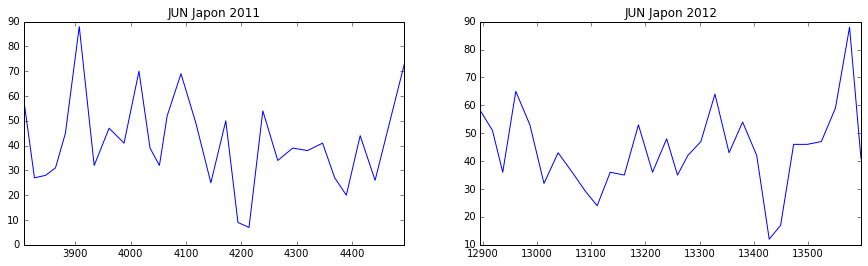

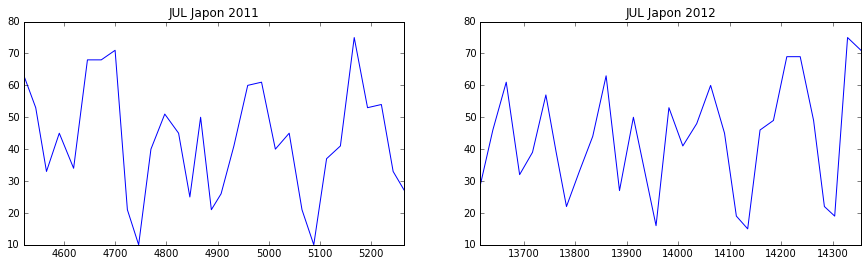

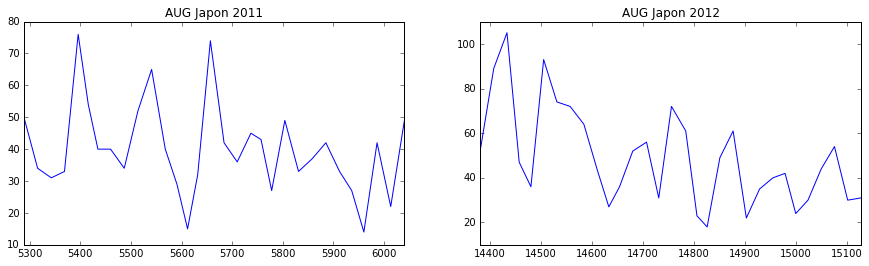

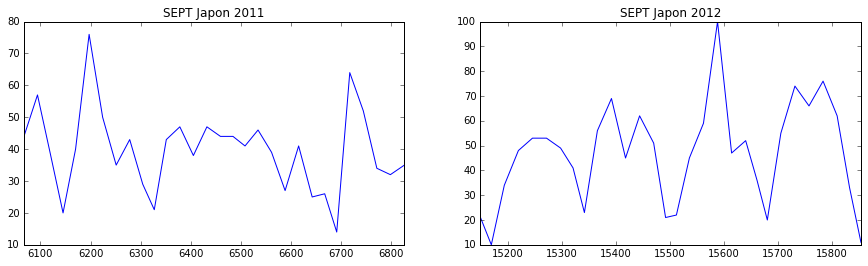

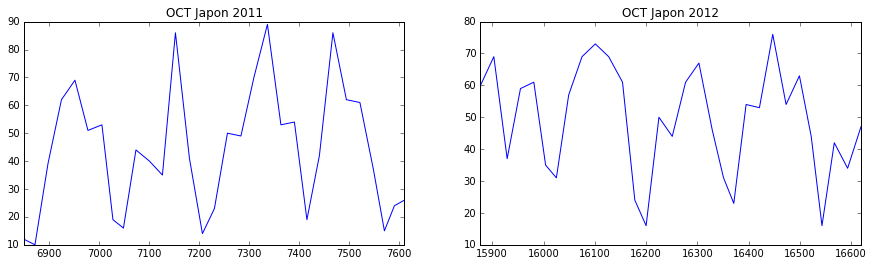

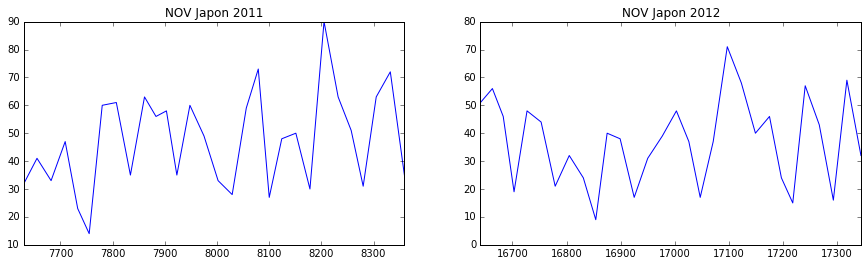

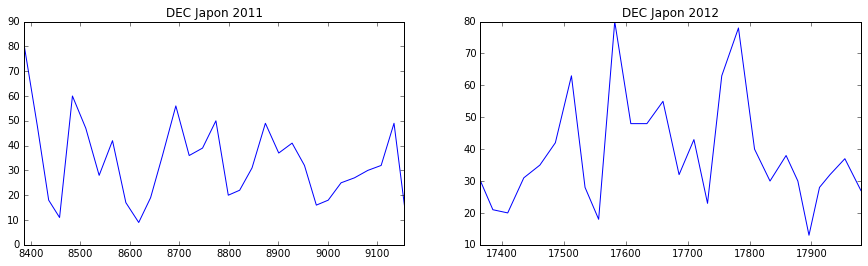

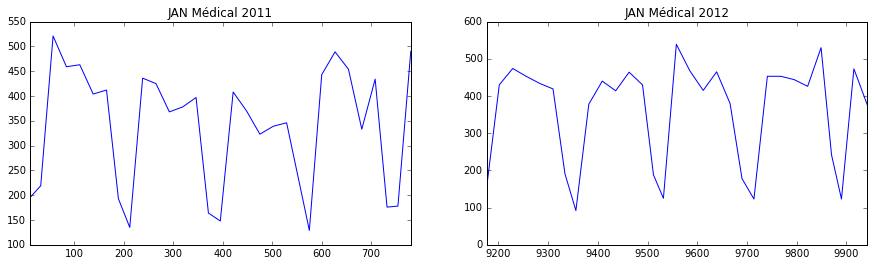

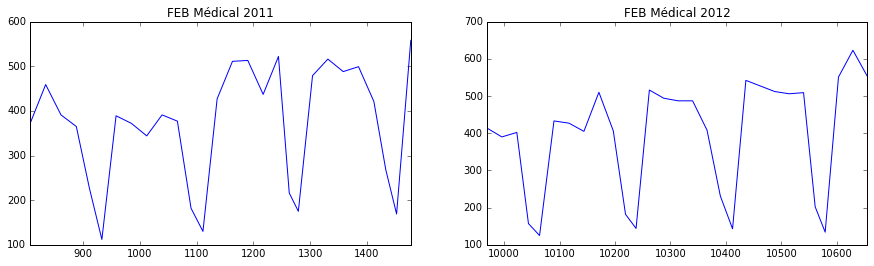

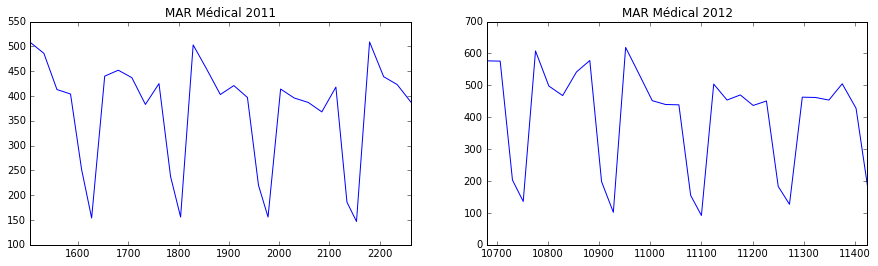

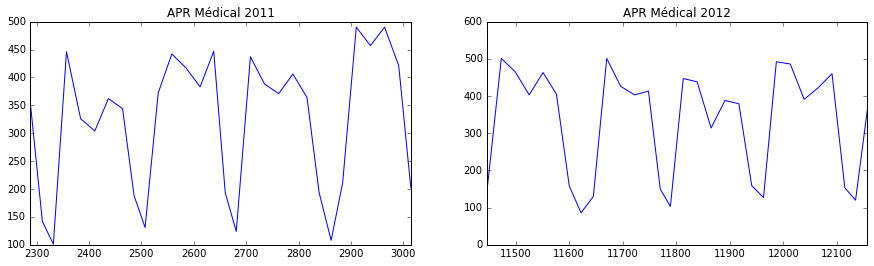

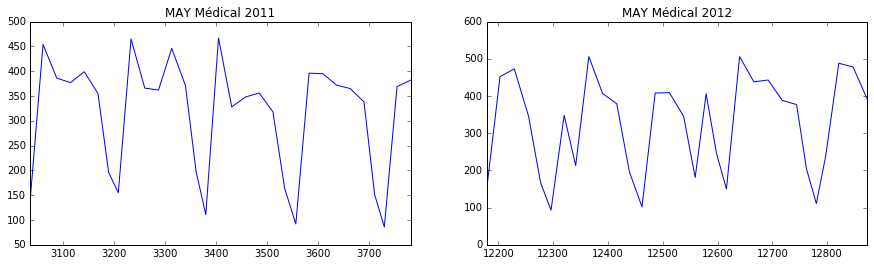

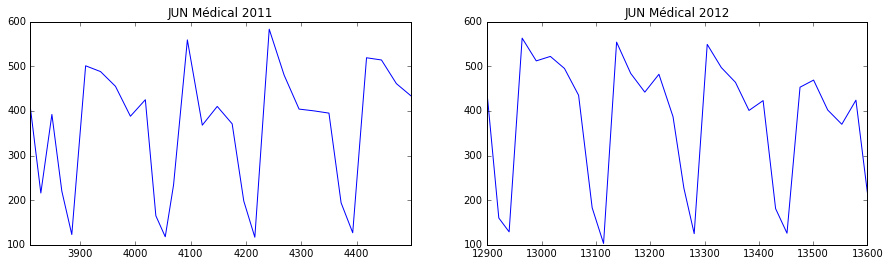

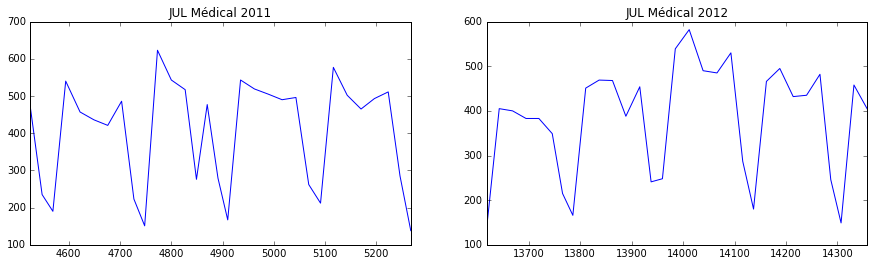

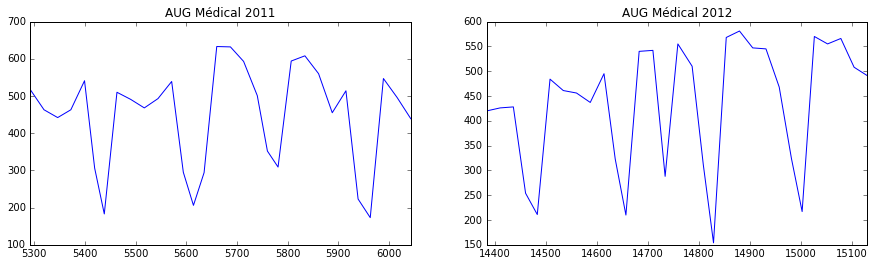

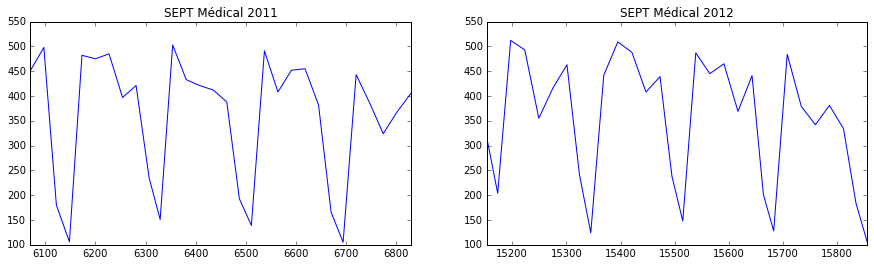

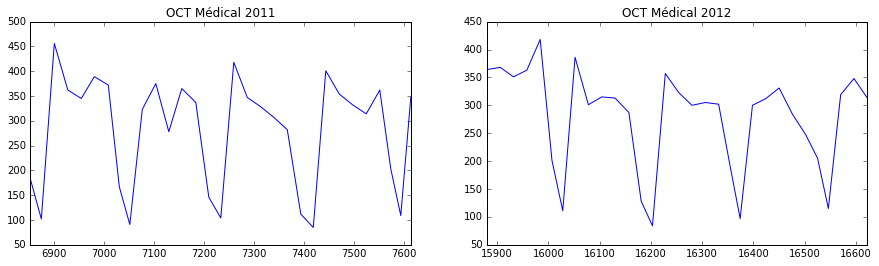

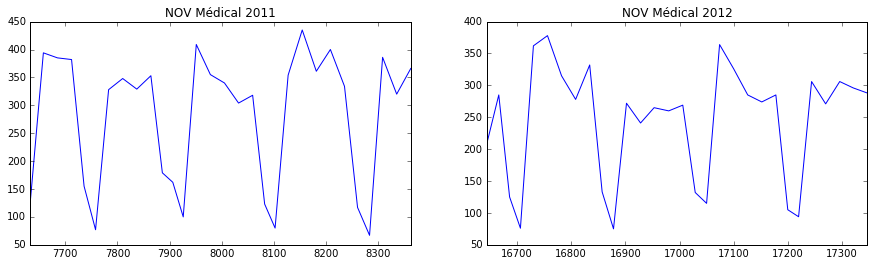

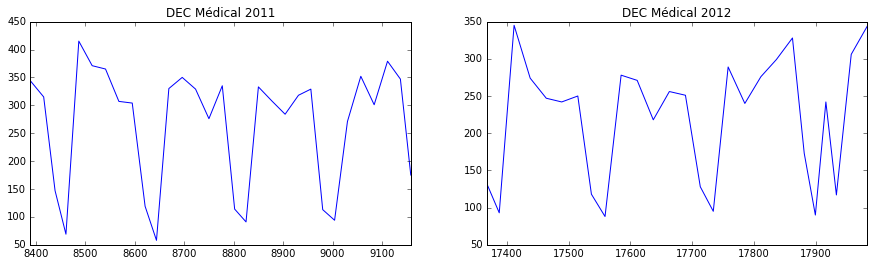

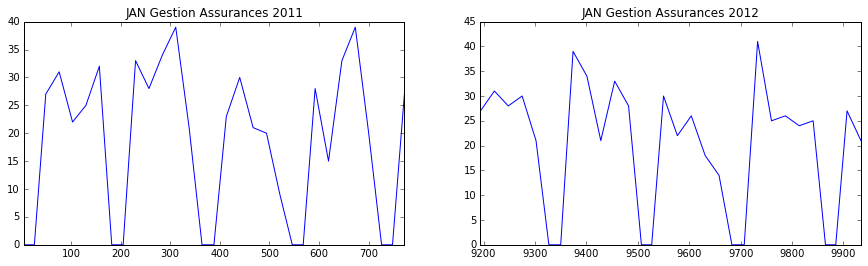

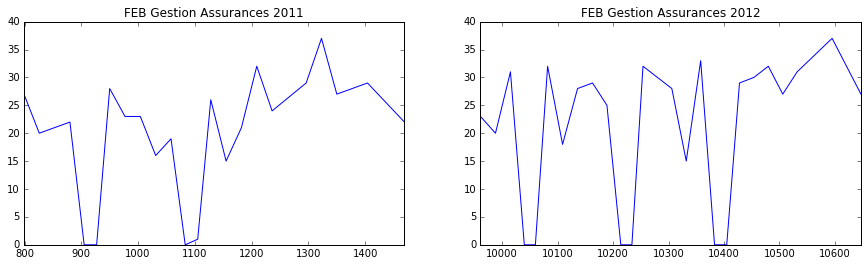

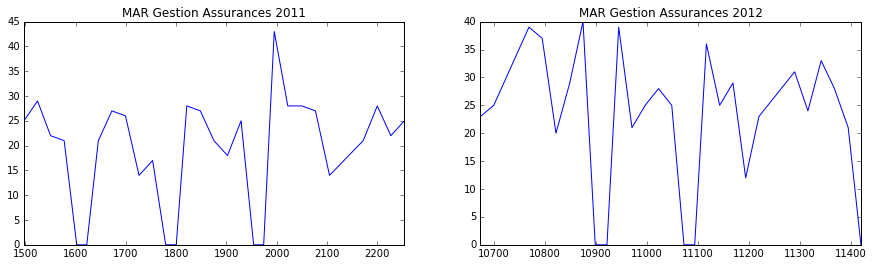

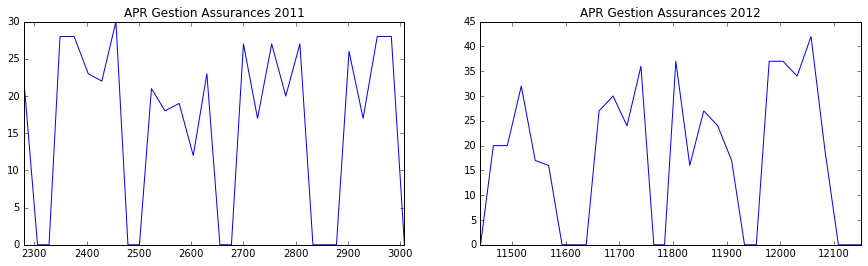

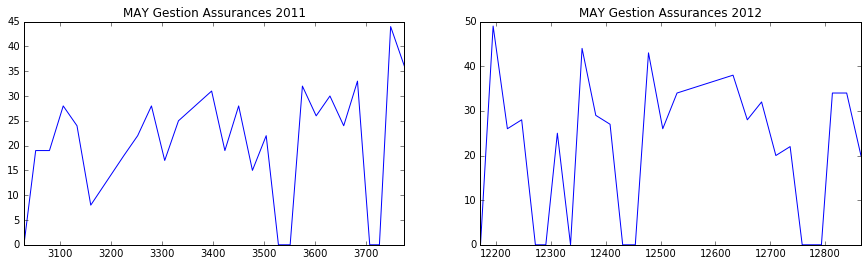

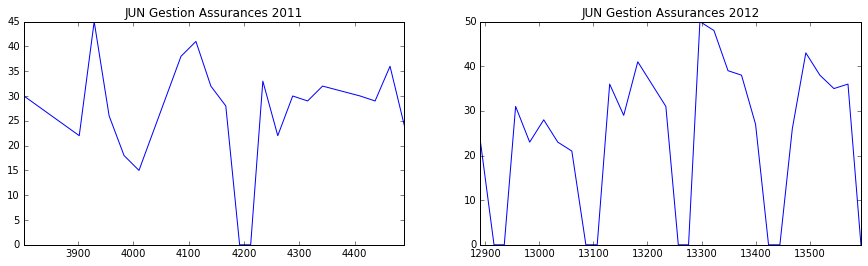

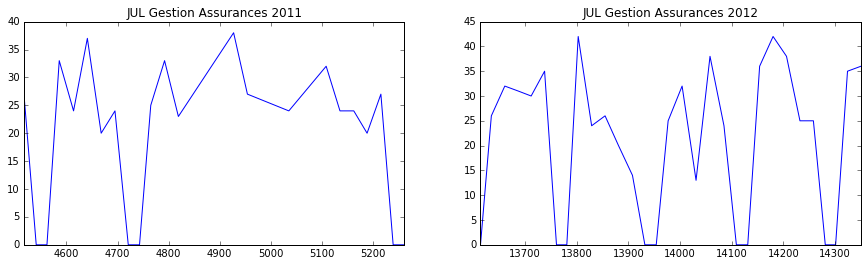

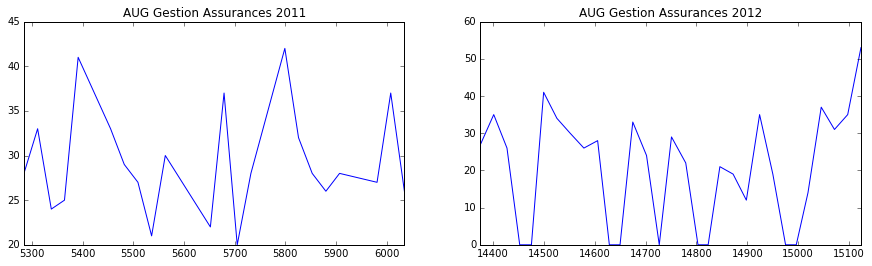

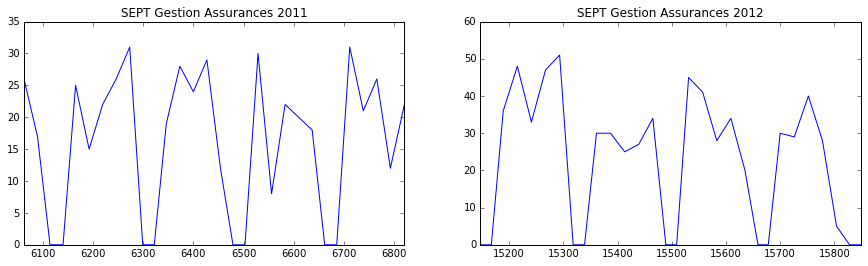

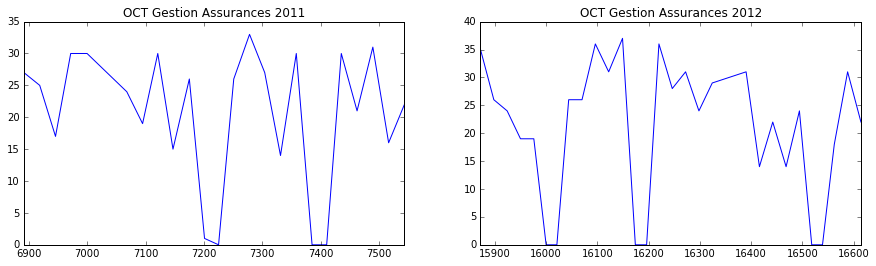

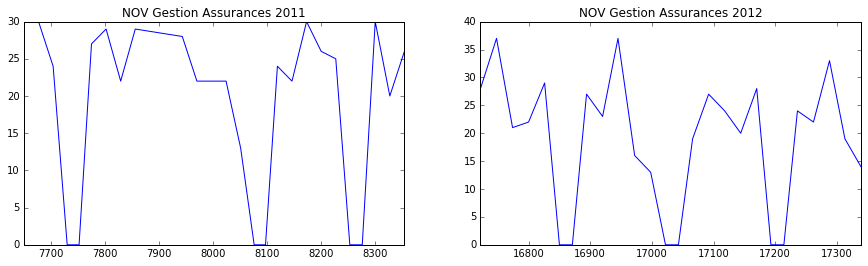

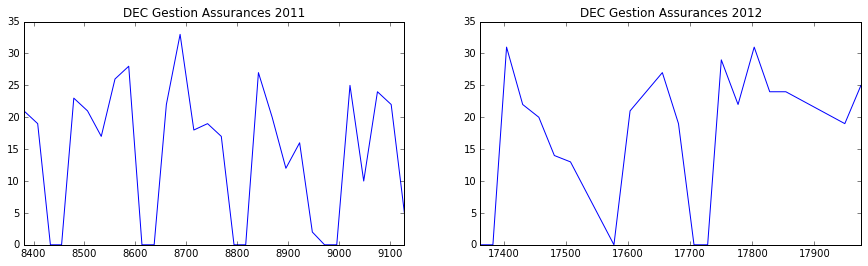

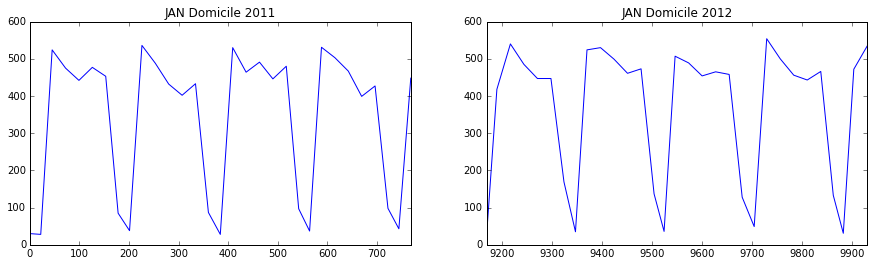

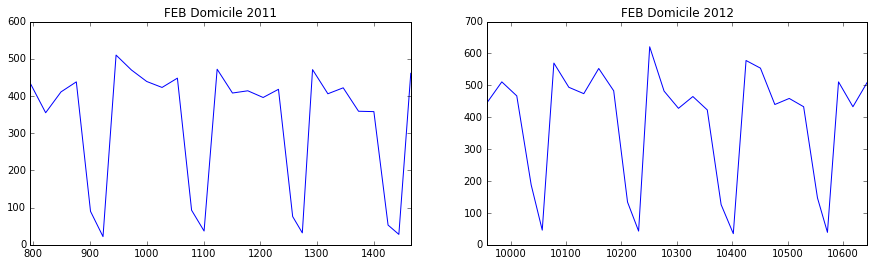

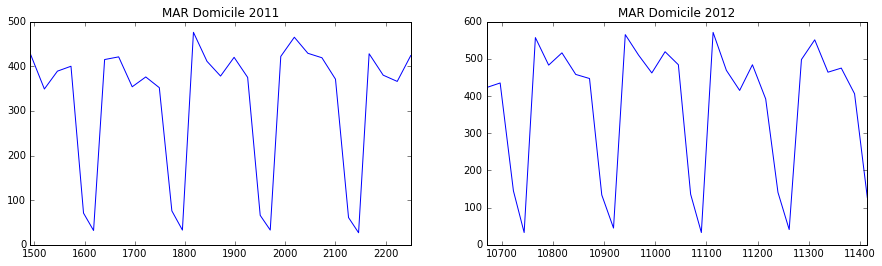

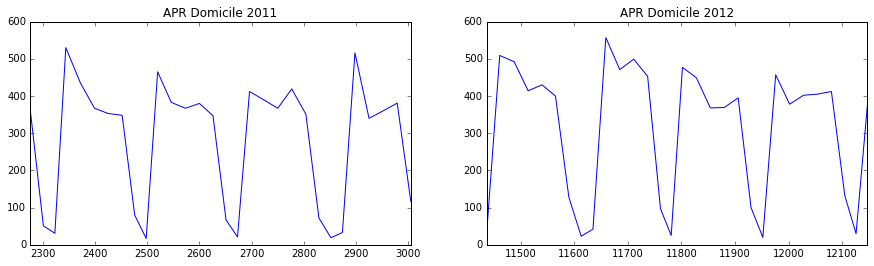

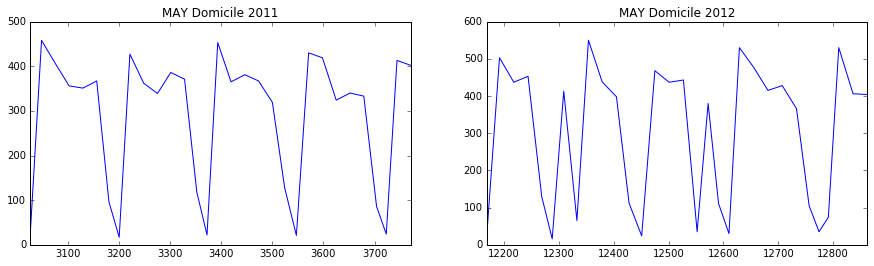

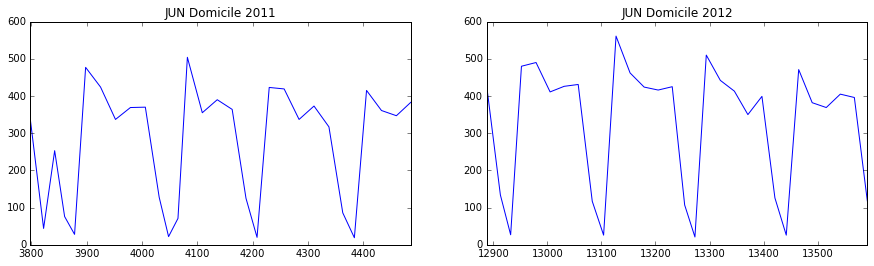

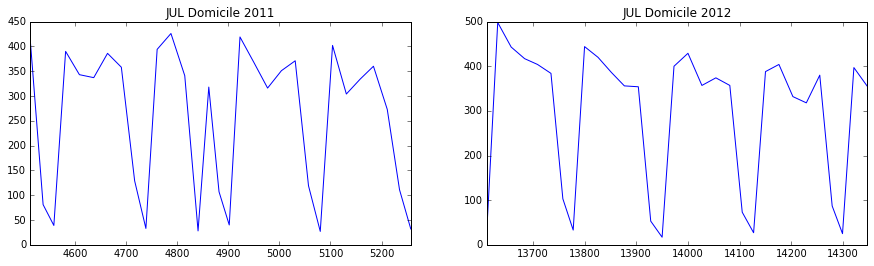

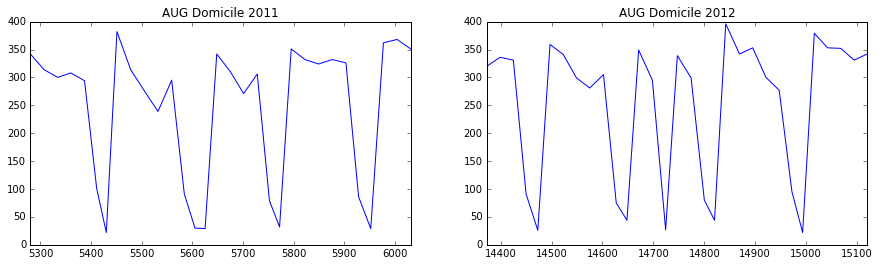

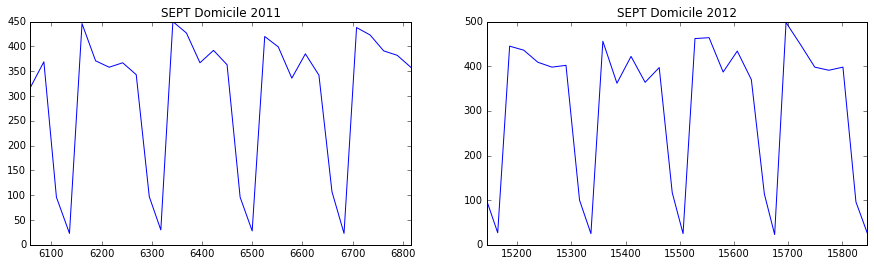

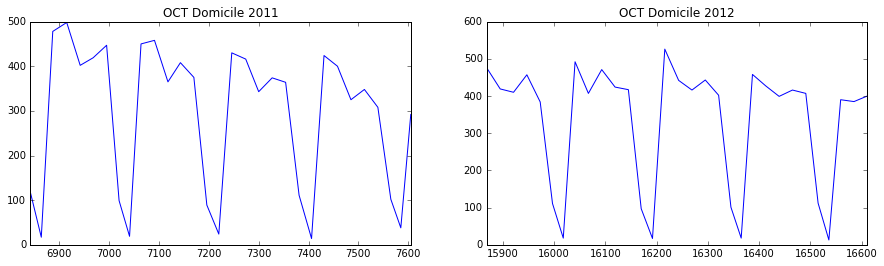

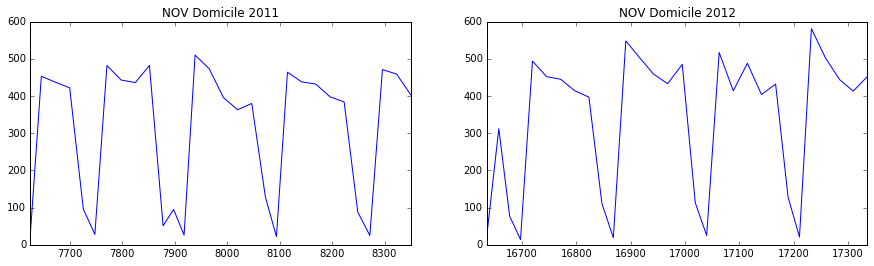

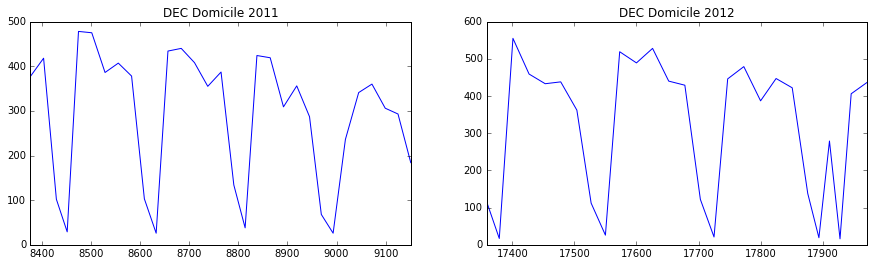

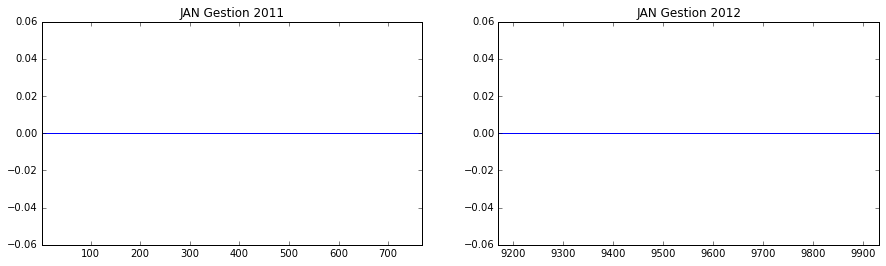

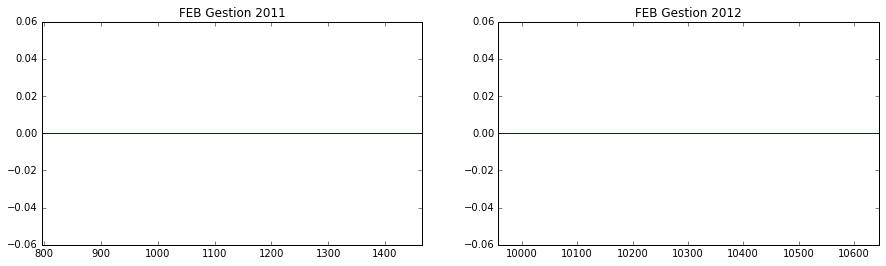

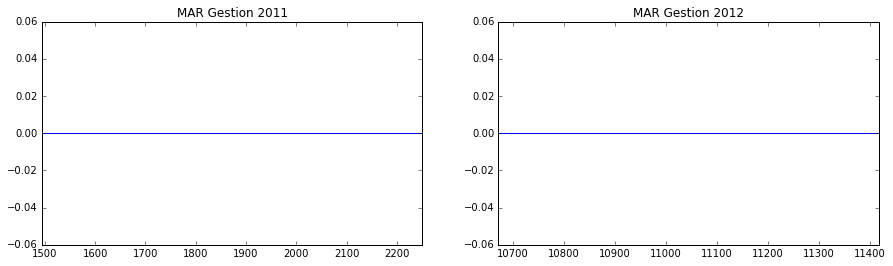

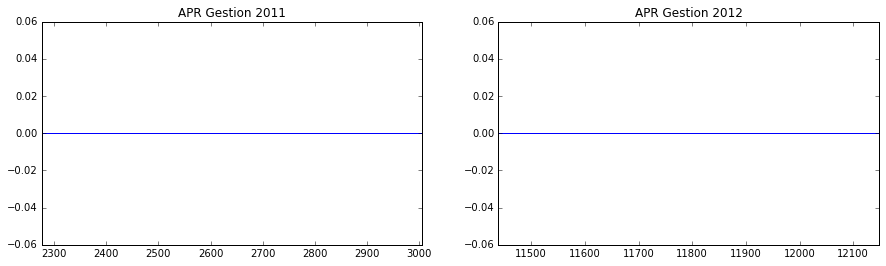

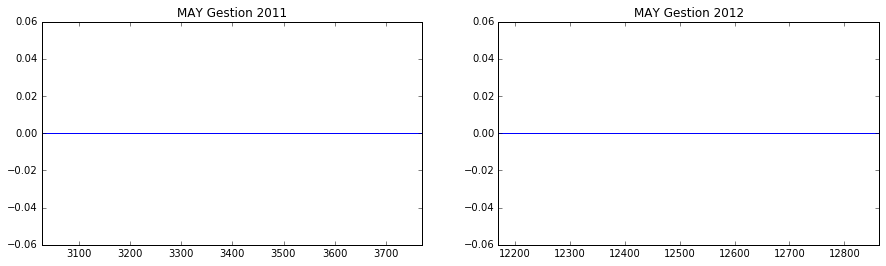

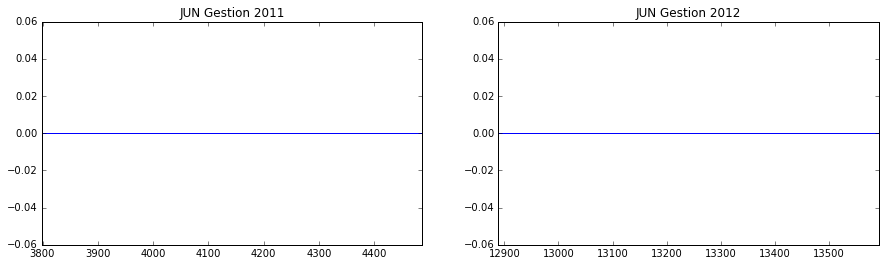

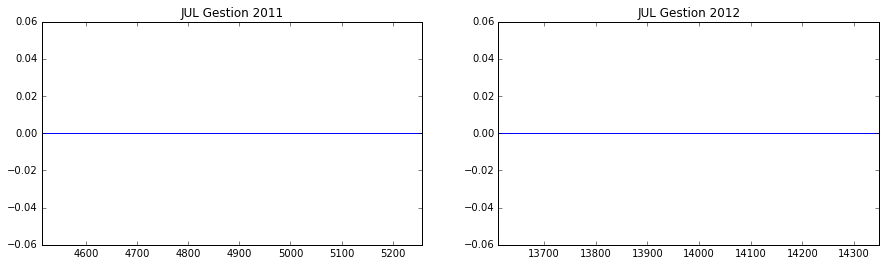

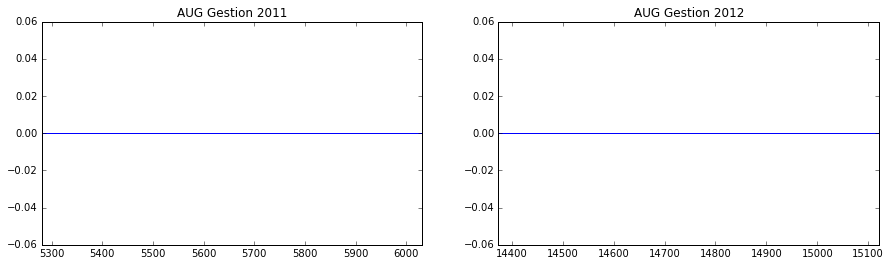

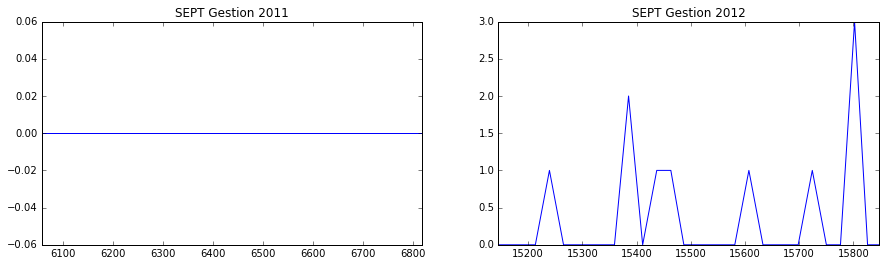

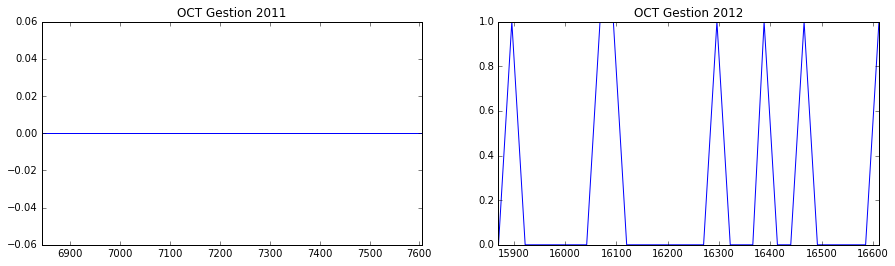

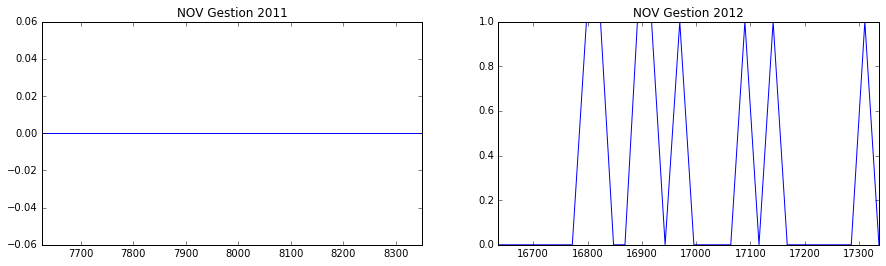

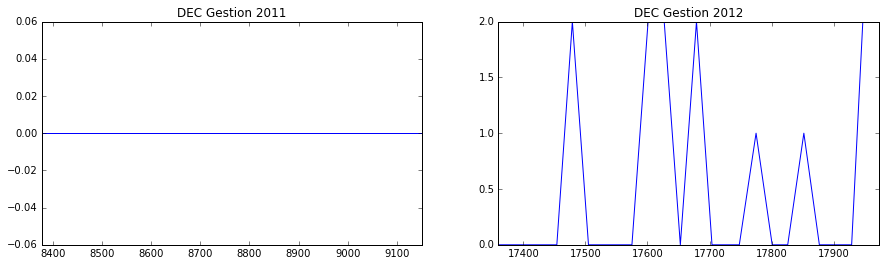

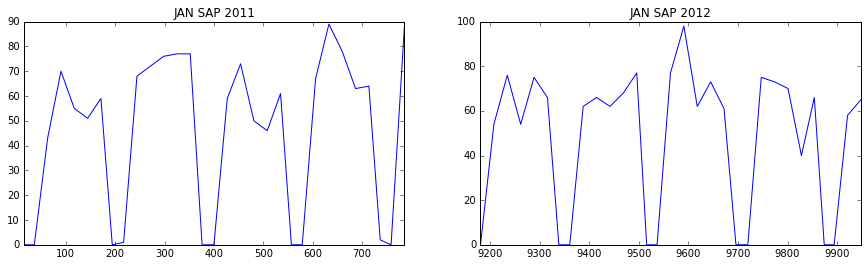

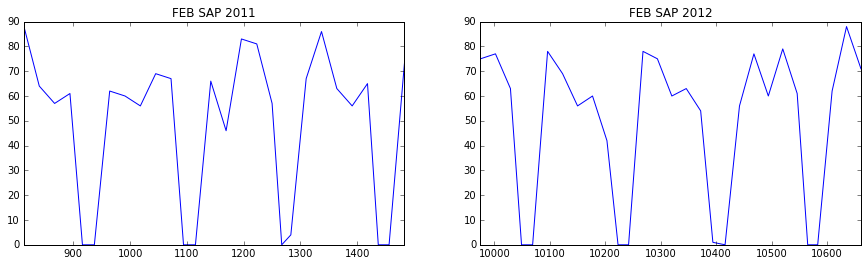

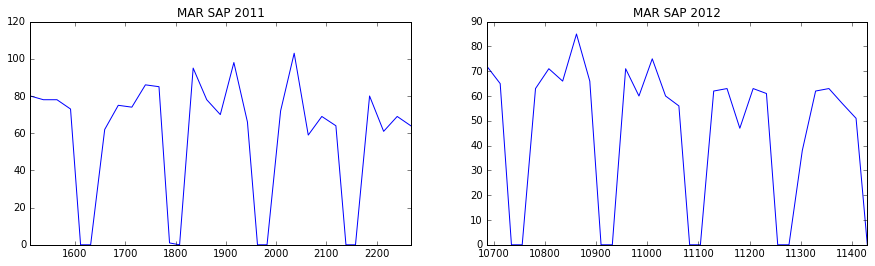

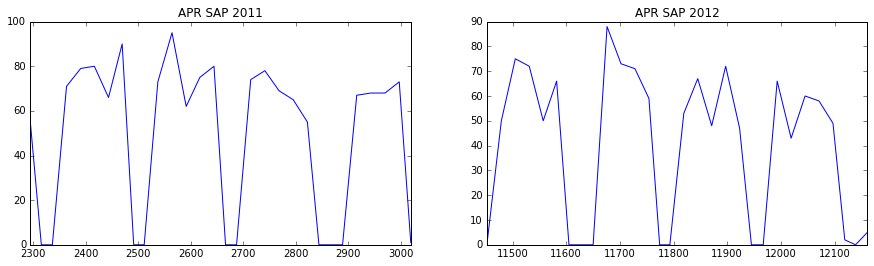

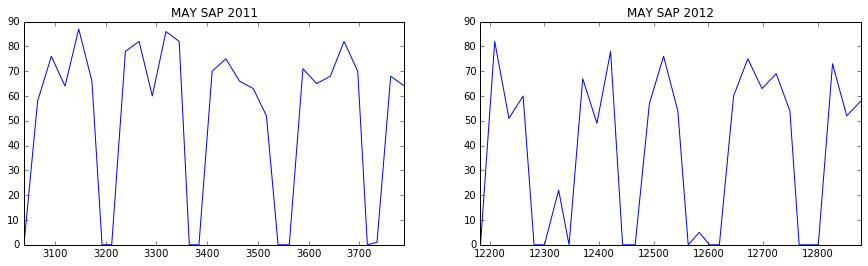

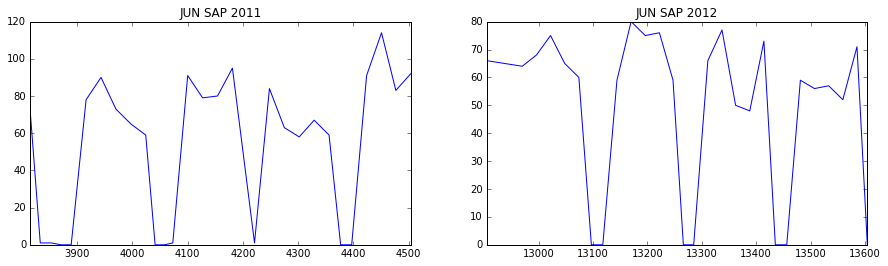

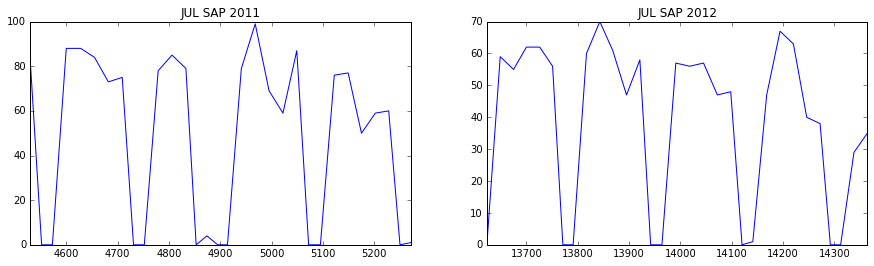

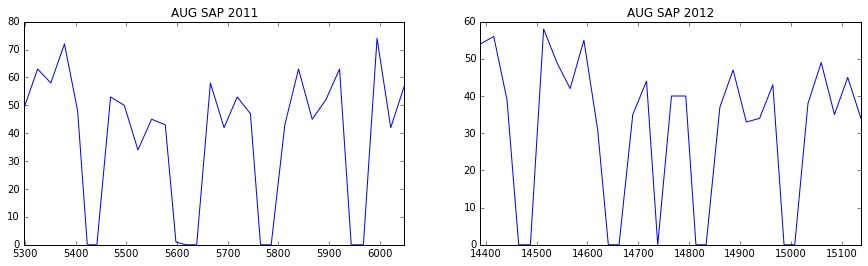

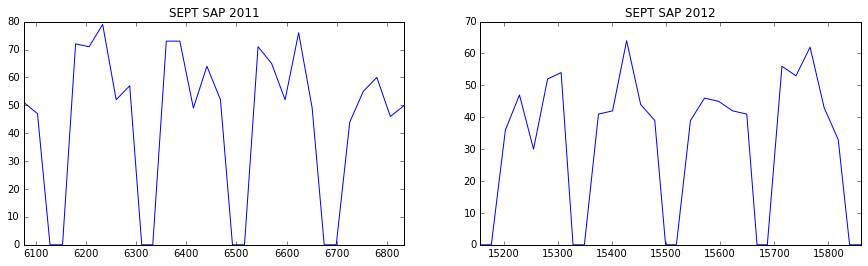

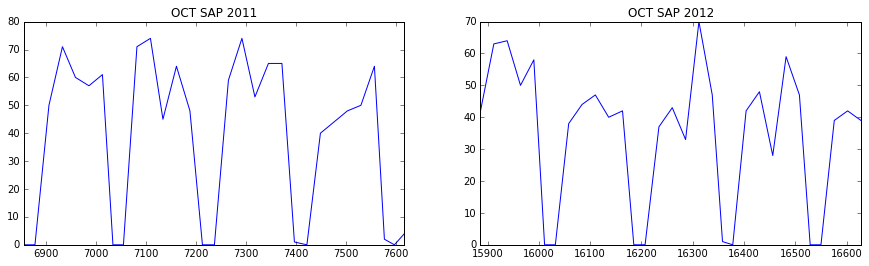

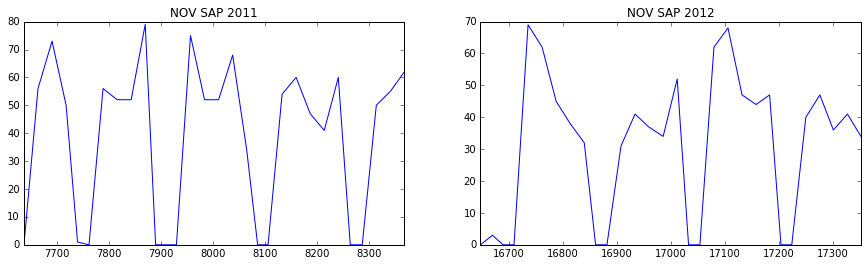

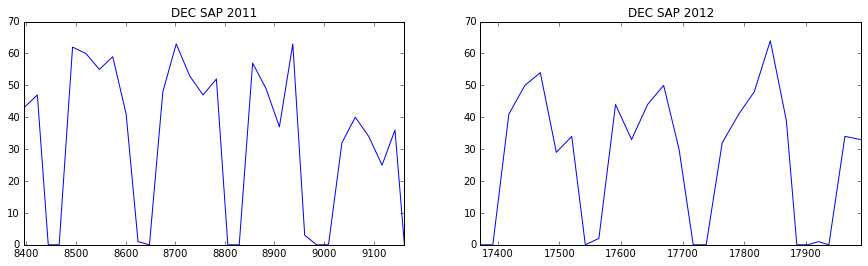

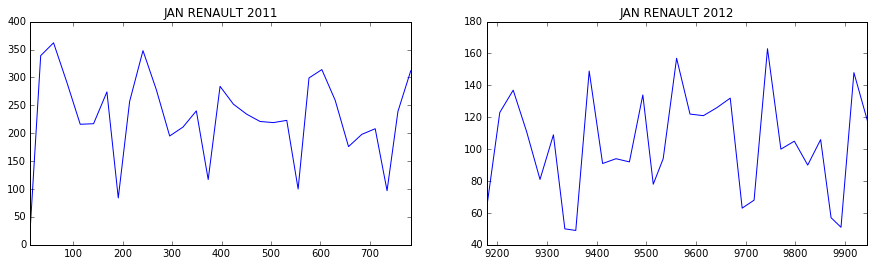

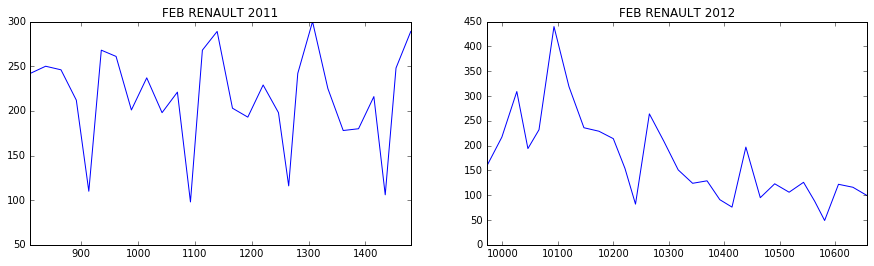

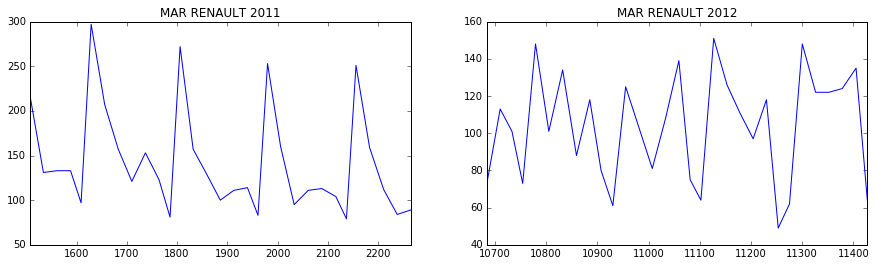

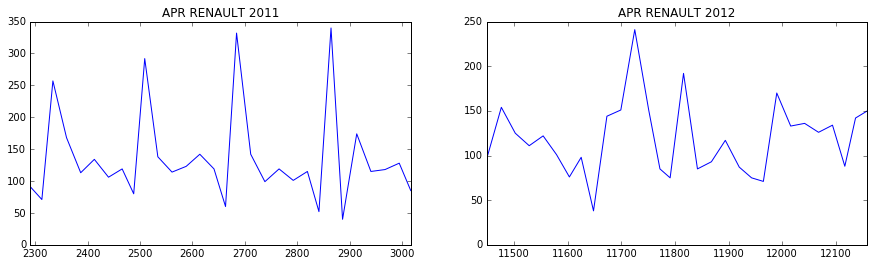

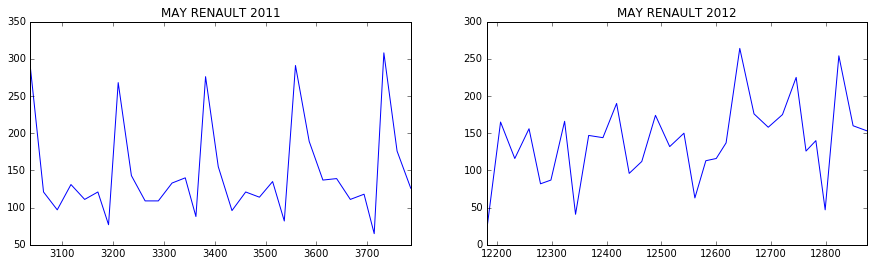

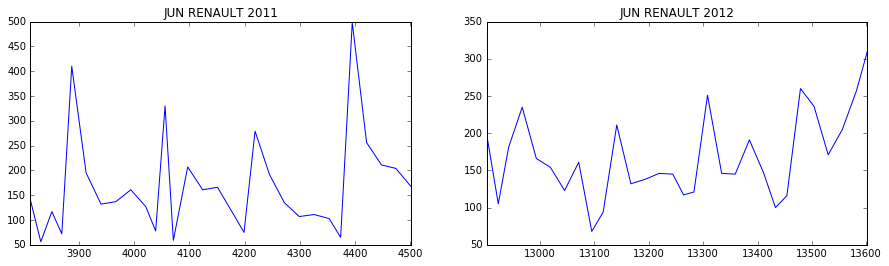

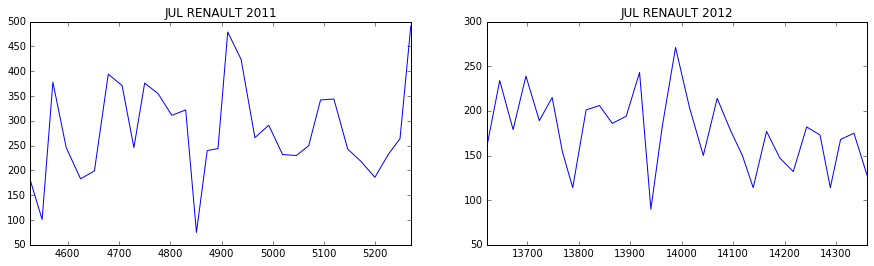

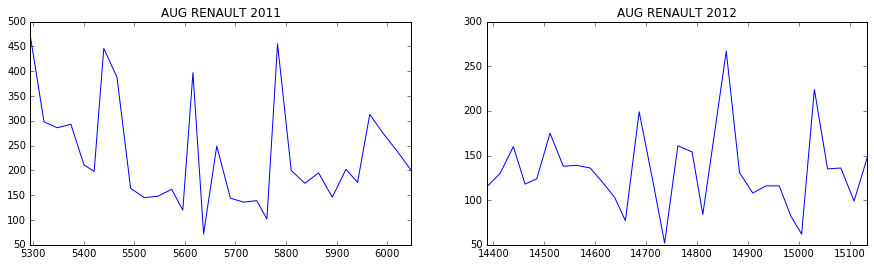

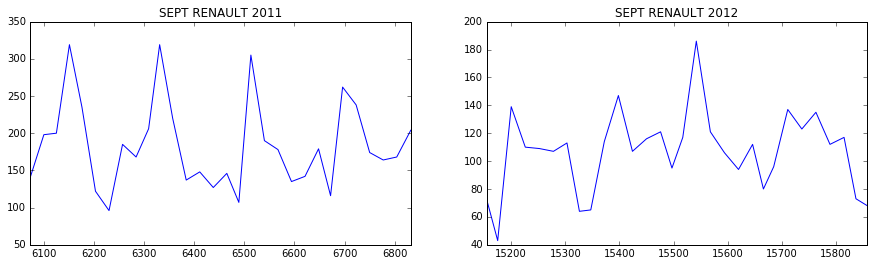

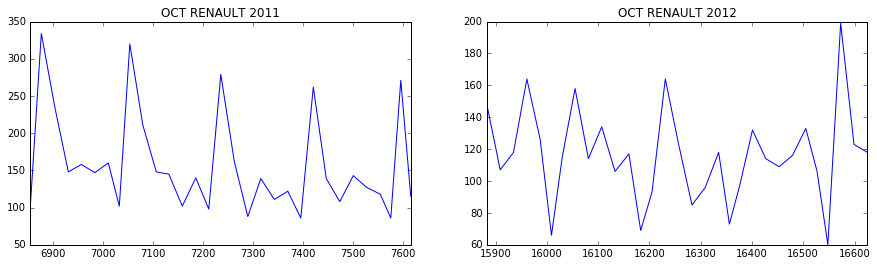

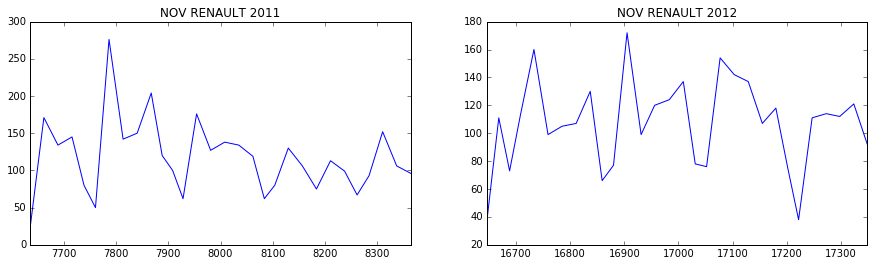

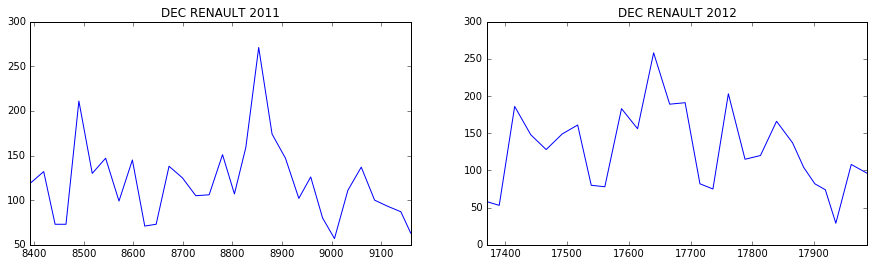

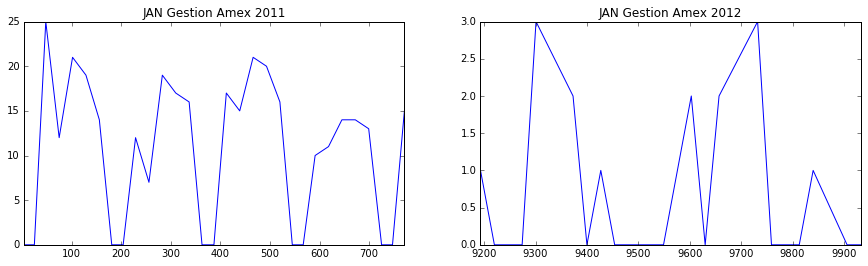

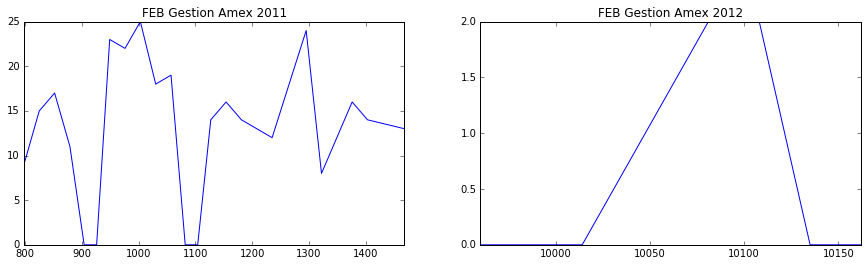

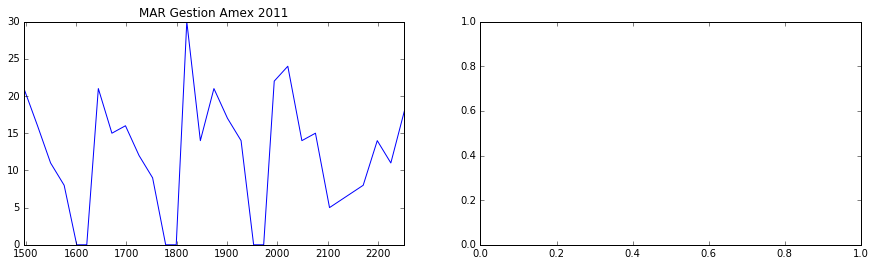

In [18]:
def sum_per_day_ass(ass):
    return sum_per_day_per_ass[sum_per_day_per_ass['ASS_ASSIGNMENT']==ass]
for ass in list_of_ass:
    print(ass)
    s_p_d = sum_per_day_ass(ass)
    for i in range(1,13):
        sum_per_day_m = s_p_d[(s_p_d['month']==i) & (s_p_d['year']==2011) ]['sum']
        sum_per_day_m2 = s_p_d[(s_p_d['month']==i) & (s_p_d['year']==2012) ]['sum']
        plt.figure(figsize=(15.0, 4.0))
        plt.subplot(1,2,1)
        sum_per_day_m.plot('line')
        plt.title(month[i-1] +' '+ ass + " 2011")
        plt.subplot(1,2,2)
        sum_per_day_m2.plot('line')
        plt.title(month[i-1] +' '+ ass + " 2012")
    

Je ne sais pas comment corriger l'erreur car si mon dataframe est vide, qu'est ce que je peux y faire?